In [2]:
import h5py
import numpy as np
import os
%matplotlib inline
import matplotlib
from matplotlib import mlab as mlab
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

In [3]:
# Set up hdf5 file path
path = '/home/stella/data/testData/preprocessed_regcvn.1000_of_1300.h5'

In [4]:
# Check keys in hdf5 file
f = h5py.File(path,'r')
f.keys()

<KeysViewHDF5 ['eventcalE', 'eventint', 'eventmap', 'eventrecE', 'eventtrueE', 'eventvtx', 'prong3mom', 'prongmap', 'prongrecE', 'prongtrueE']>

In [5]:
# Notes
"""# event: whole collection. 
# Prong: each electron.
# calE: classic sum of the energy.
# Map: energy map
# recE: reconstruction energy sum
# 3mom: momentum, x,y,z 3 directions"""
"""*args and **kwargs allow you to pass an unspecified number of arguments to a function.
 *args: send a non-keyworded variable length argument list to the function. 
 **kwargs : pass keyworded variable length of arguments to a function. e.g. map or dict 
 https://book.pythontips.com/en/latest/args_and_kwargs.html"""
"""df = nova.dataprocessing.get_dataframe(number=idx, dir=path, tag=ftag)
df.to_hdf(path_or_buf=os.path.join(newpath, str(idx + idx_offset) + '.h5'),key='df',complevel=9)"""

"df = nova.dataprocessing.get_dataframe(number=idx, dir=path, tag=ftag)\ndf.to_hdf(path_or_buf=os.path.join(newpath, str(idx + idx_offset) + '.h5'),key='df',complevel=9)"

In [6]:
f['eventcalE']

<HDF5 group "/eventcalE" (6 members)>

In [7]:
f['eventcalE']['df']

<HDF5 dataset "df": shape (1362,), type "<f4">

In [8]:
f['eventcalE']

<HDF5 group "/eventcalE" (6 members)>

In [9]:
f['eventmap']['df'] # 1362 events

<HDF5 dataset "df": shape (1362, 16000), type "|u1">

In [10]:
f['eventmap']['df'][0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [11]:
dset_eventmap = f['eventmap']['df']

In [12]:
# reshape could make array into any shape, but only 2 'views' in detector, 
# so it get two 100*80 pictures of the first event
dset_eventmap[0].reshape(2,100,80)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [13]:
image=dset_eventmap[0].reshape(2,100,80)

In [15]:
image.max()

117

In [16]:
image.min()

0

In [ ]:
"""fig,ax = plt.subplots()等价于：
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig, ax = plt.subplots(1,3),其中参数1和3分别代表子图的行数和列数，一共有 1x3 个子图像。函数返回一个figure图像和子图ax的array列表。
fig, ax = plt.subplots(1,3,1),最后一个参数1代表第一个子图。
如果想要设置子图的宽度和高度可以在函数内加入figsize值
fig, ax = plt.subplots(1,3,figsize=(15,7))，这样就会有1行3个15x7大小的子图。
"""

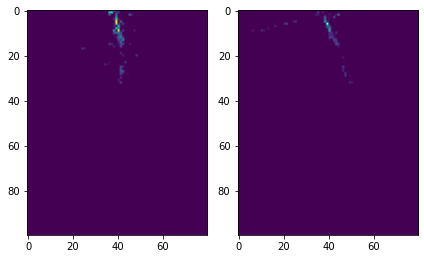

In [42]:
# draw two pixel maps for the first event
fig, axs = plt.subplots(1, 2) # row=1,col=2,two figs in total
axs[0].imshow(image[0, :, :])
axs[1].imshow(image[1, :, :])
fig.tight_layout()
plt.show()

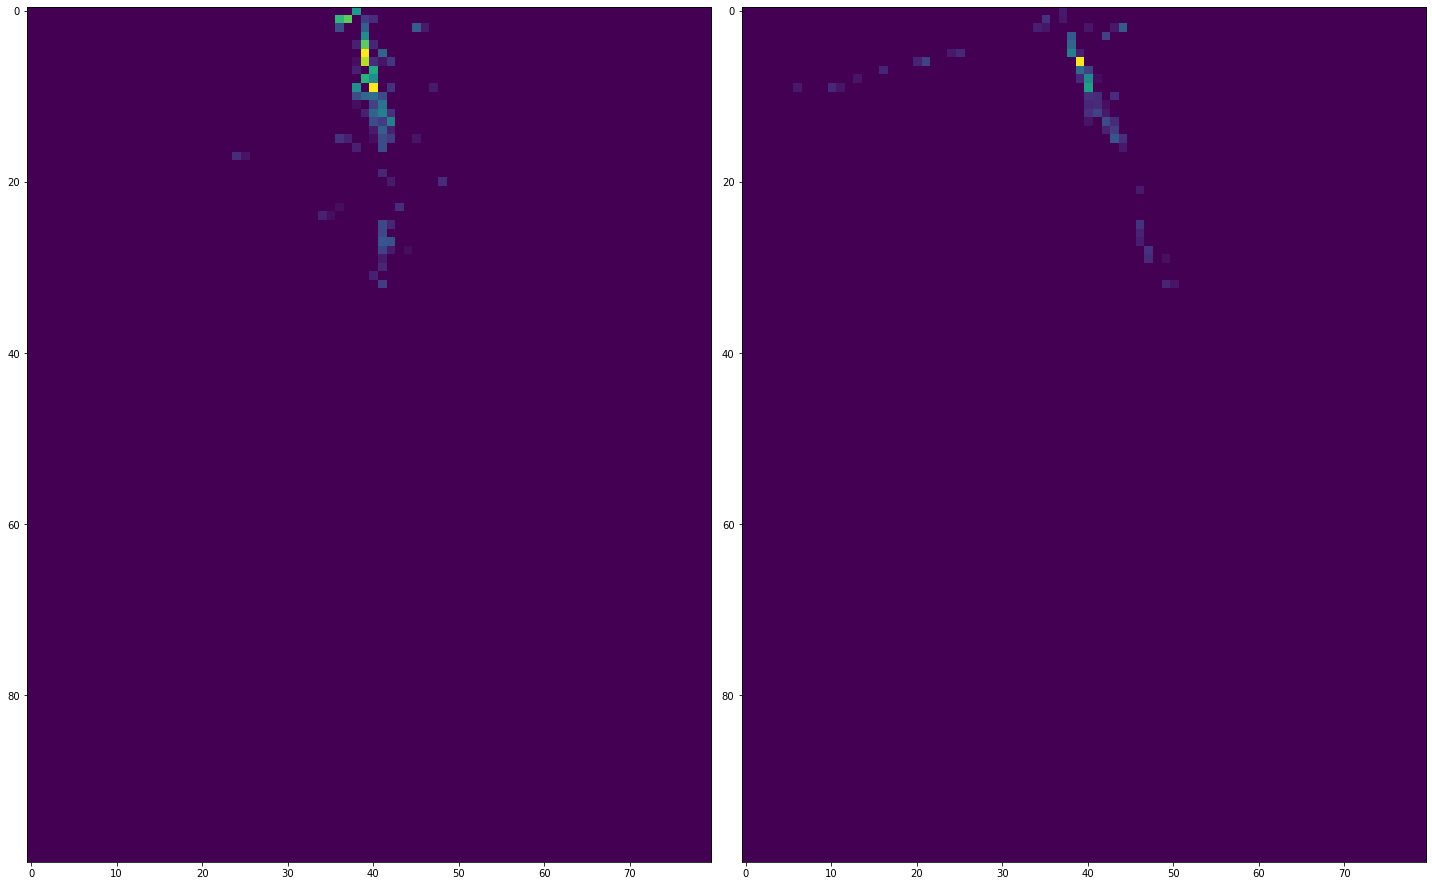

In [22]:
# draw two pixel maps for the first event in specific sizes
fig, axs = plt.subplots(1, 2, figsize=(20,20)) # row=1,col=2,two figs in total
axs[0].imshow(image[0, :, :])
axs[1].imshow(image[1, :, :])
fig.tight_layout()
plt.show()

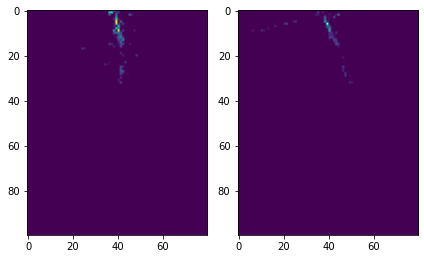

In [24]:
# draw two pixel maps for the first event in specific sizes
fig, axs = plt.subplots(1,2) # row=1,col=2,two figs in total
axs[0].imshow(image[0, :, :])
axs[1].imshow(image[1, :, :])
fig.tight_layout()
plt.show()

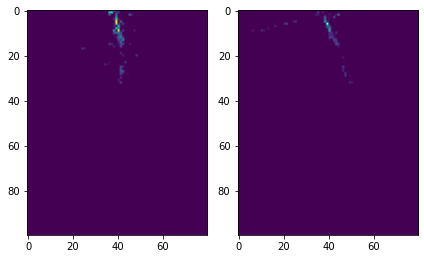

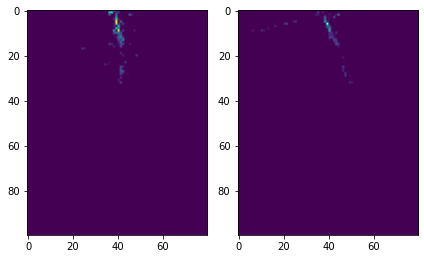

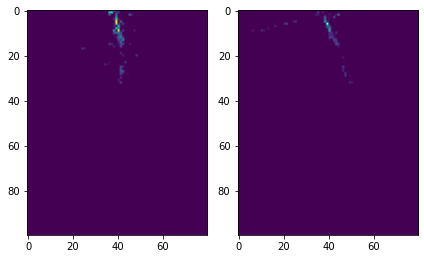

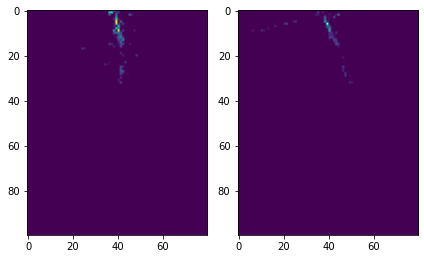

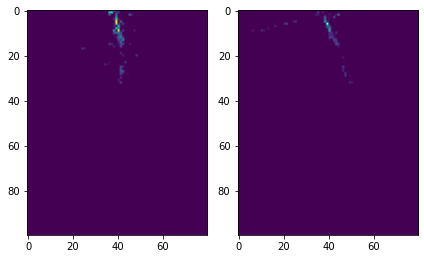

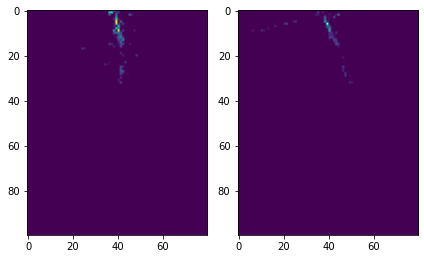

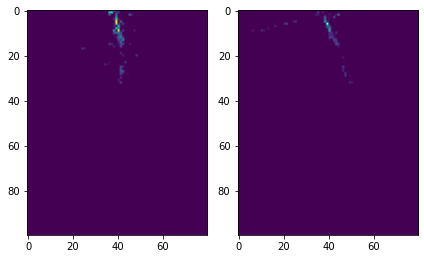

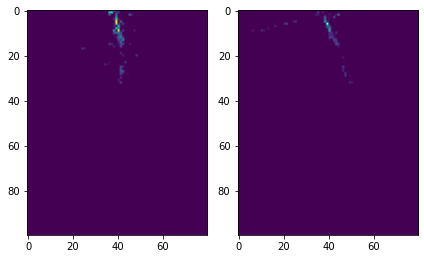

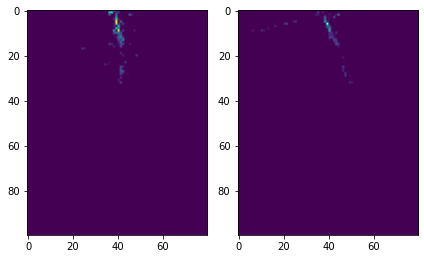

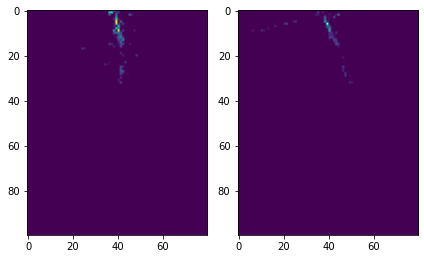

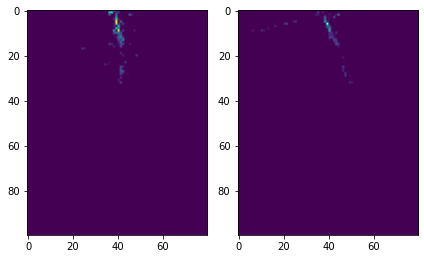

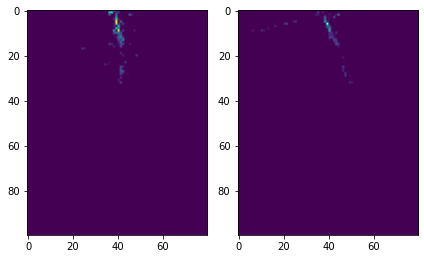

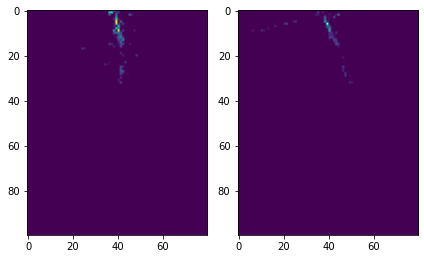

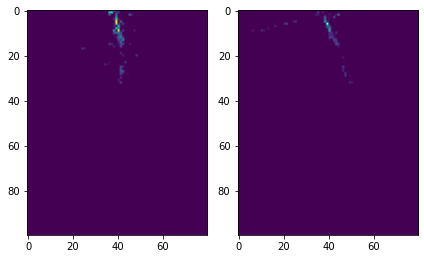

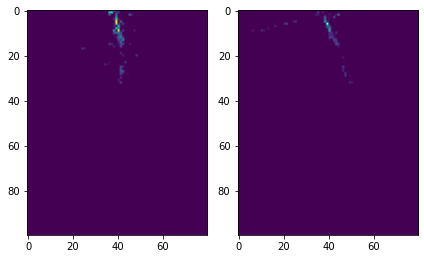

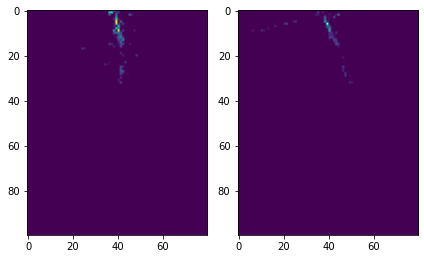

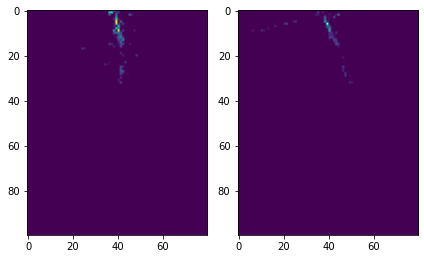

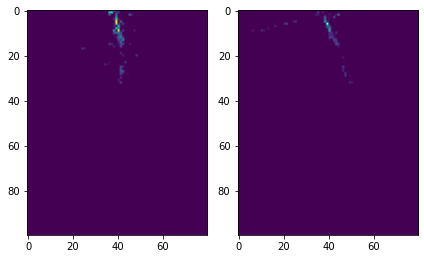

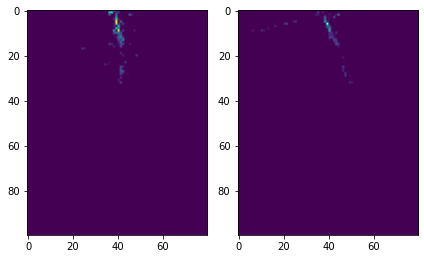

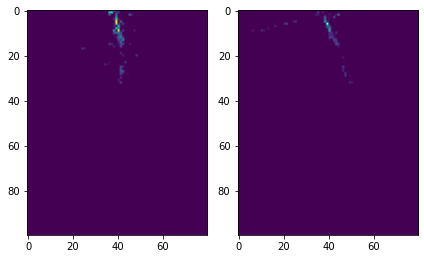

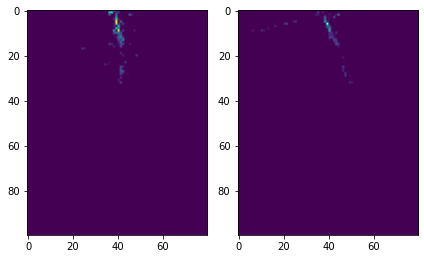

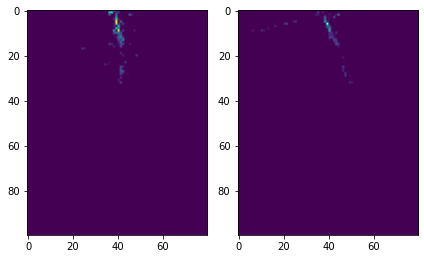

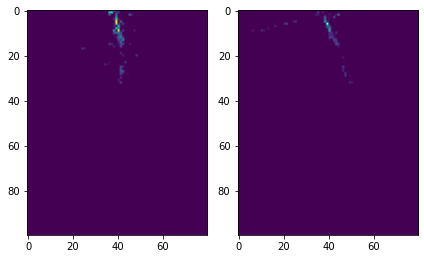

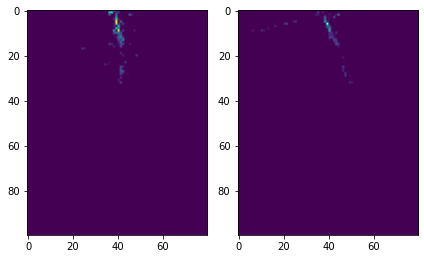

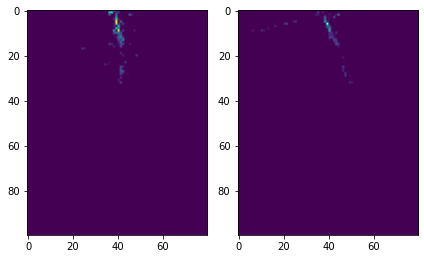

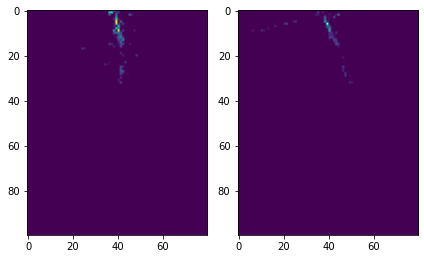

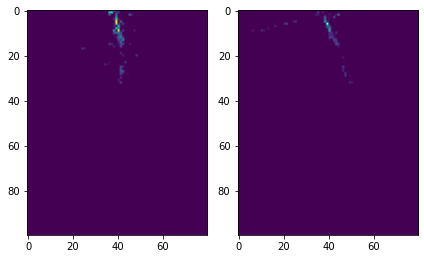

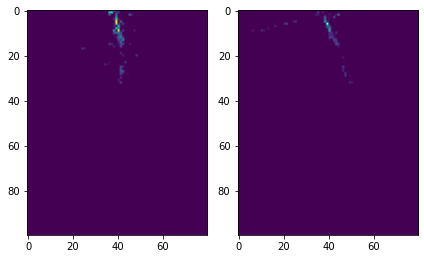

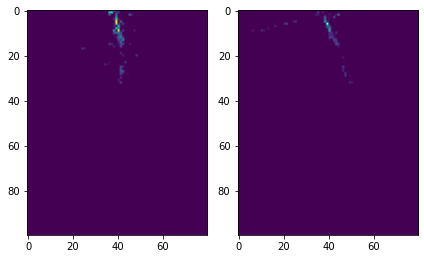

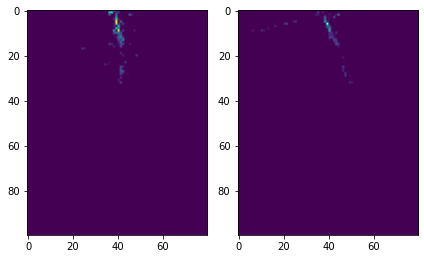

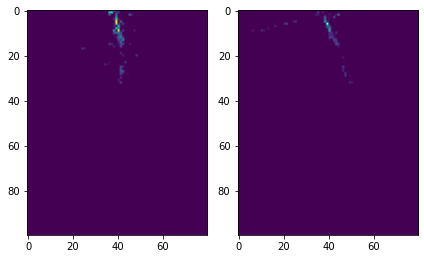

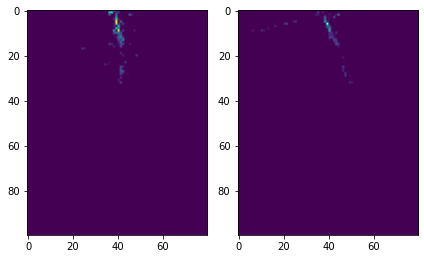

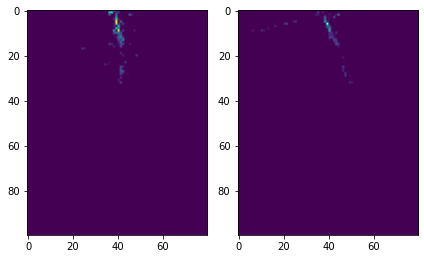

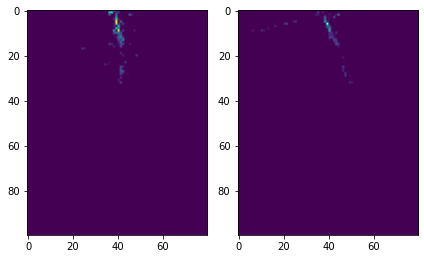

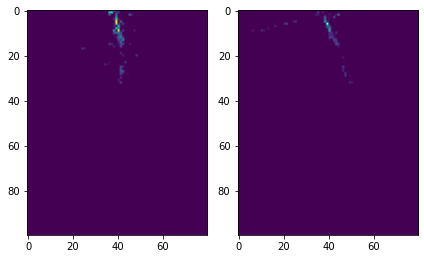

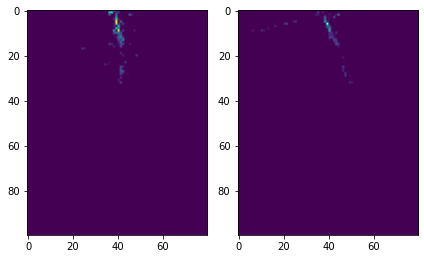

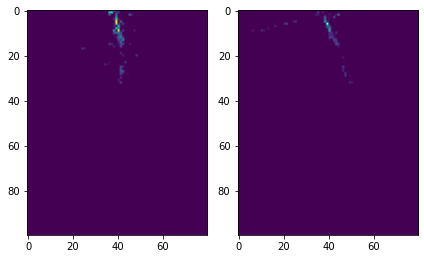

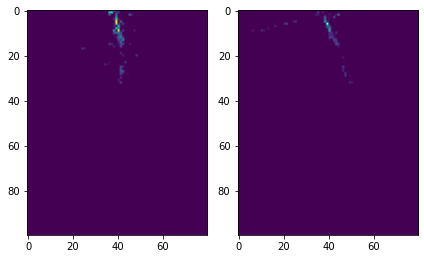

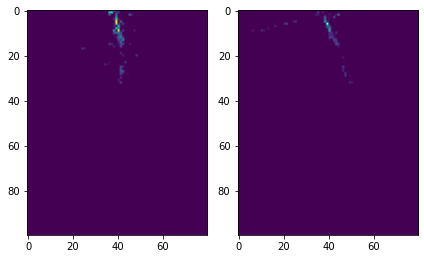

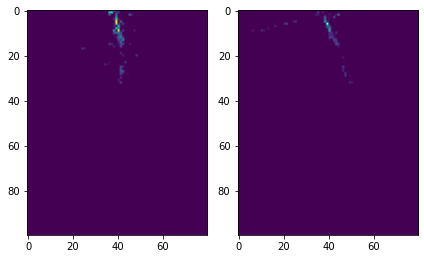

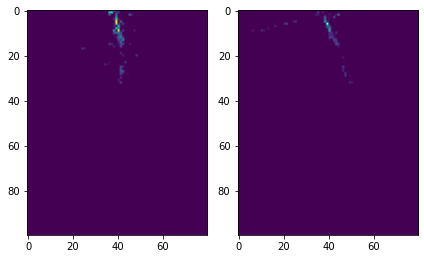

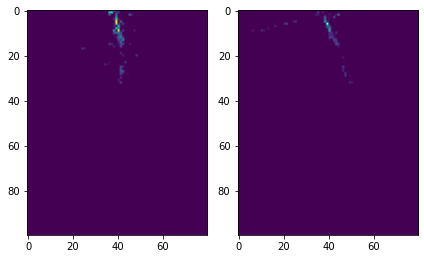

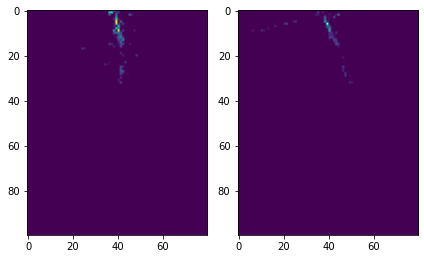

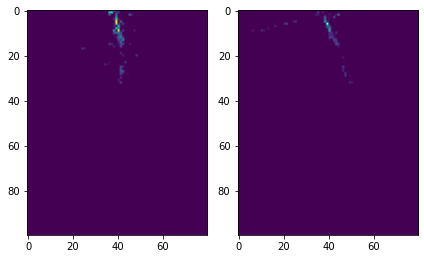

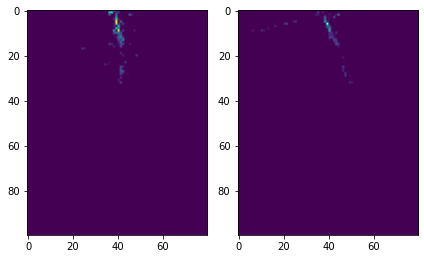

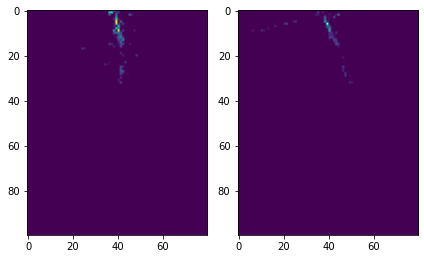

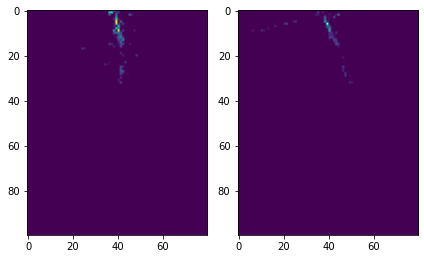

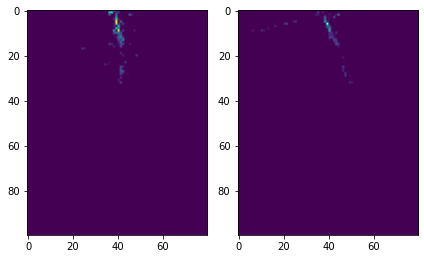

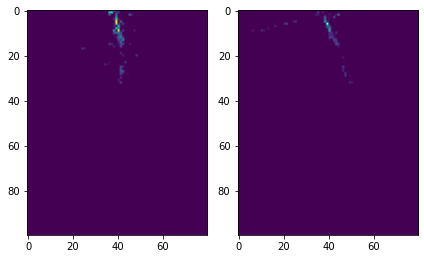

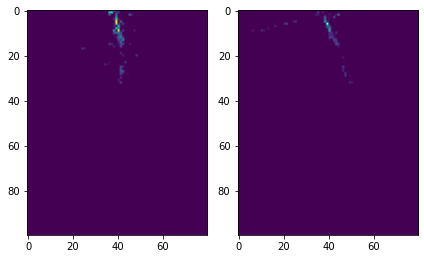

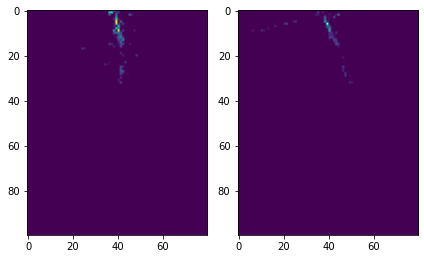

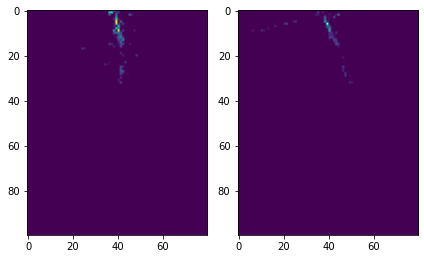

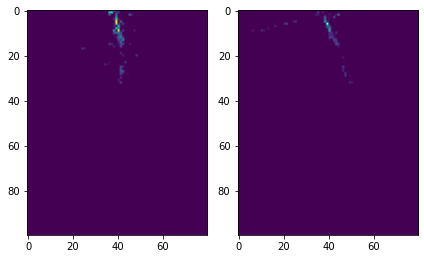

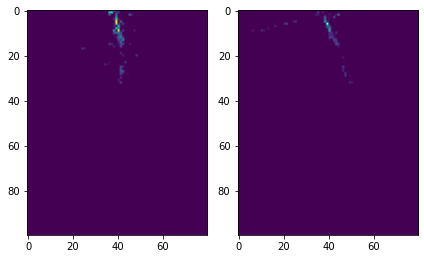

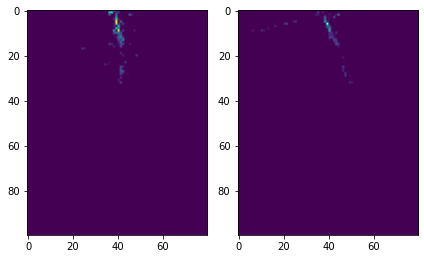

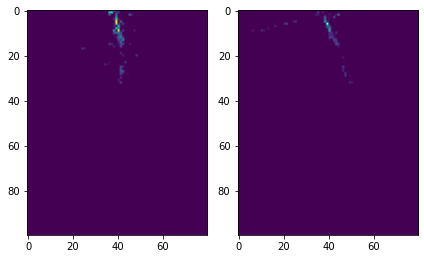

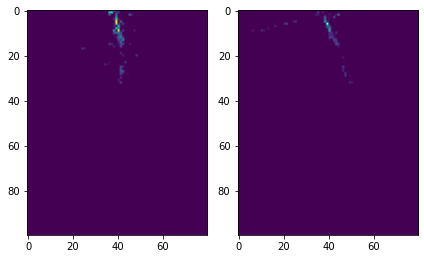

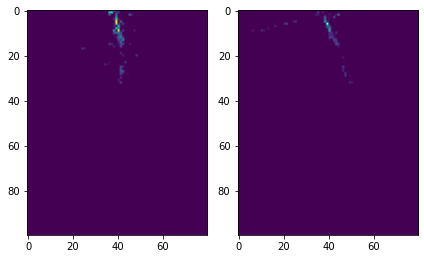

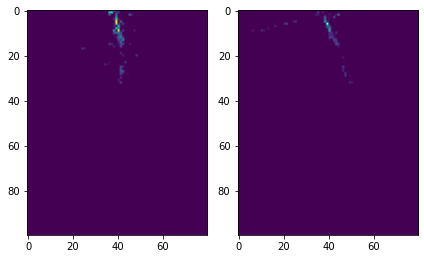

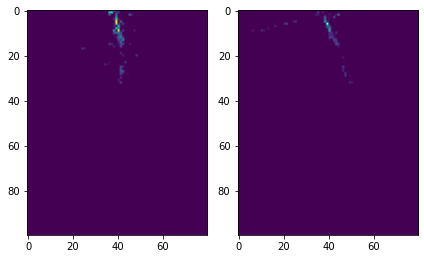

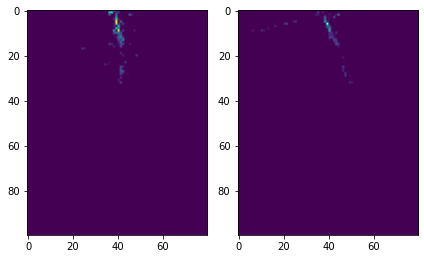

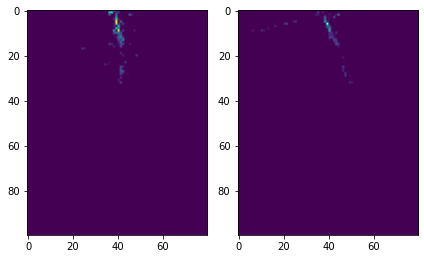

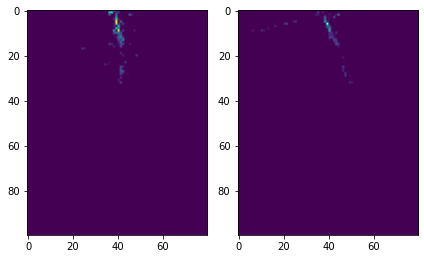

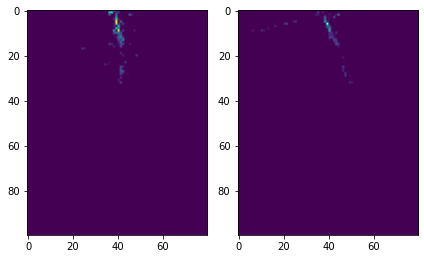

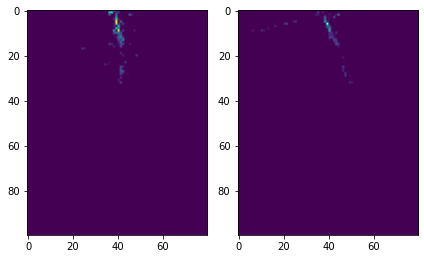

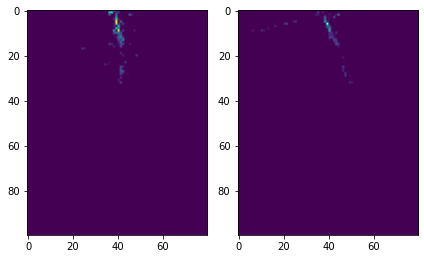

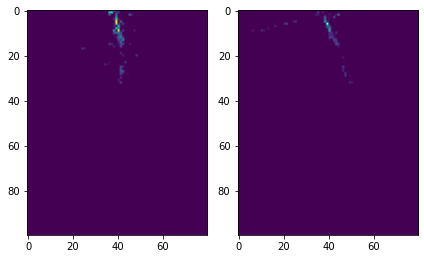

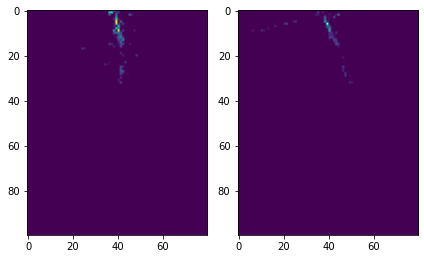

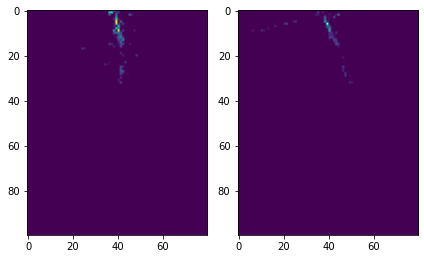

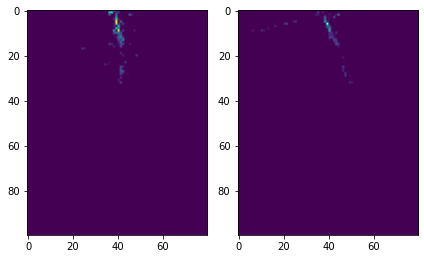

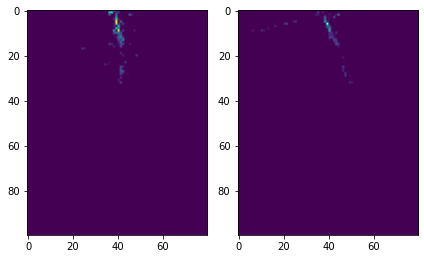

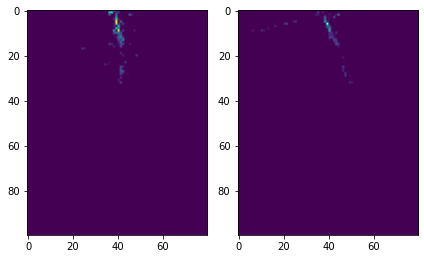

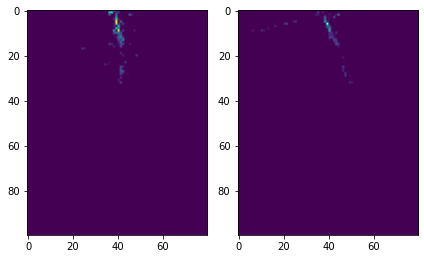

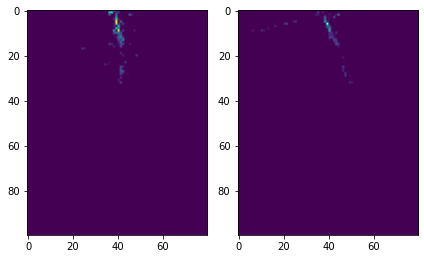

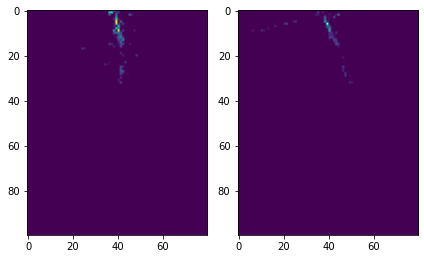

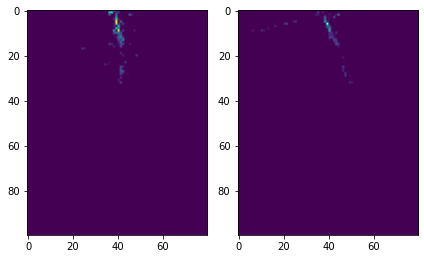

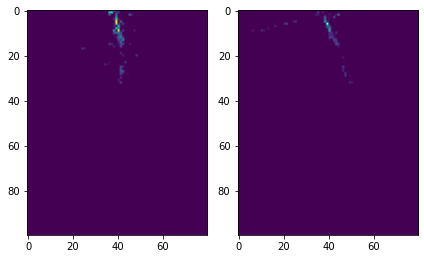

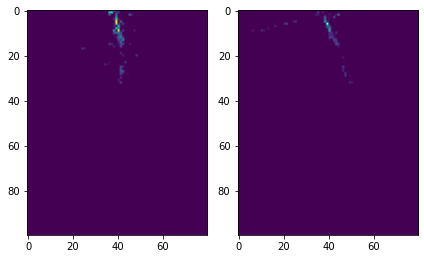

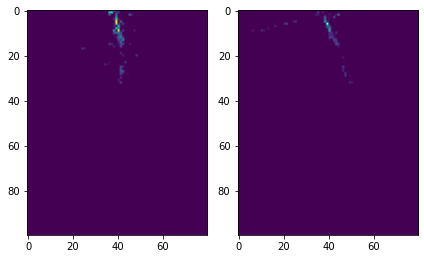

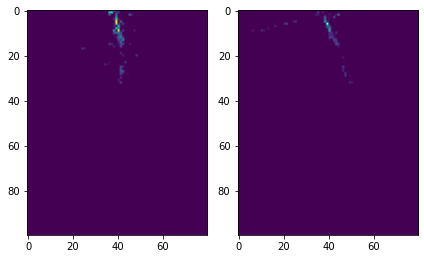

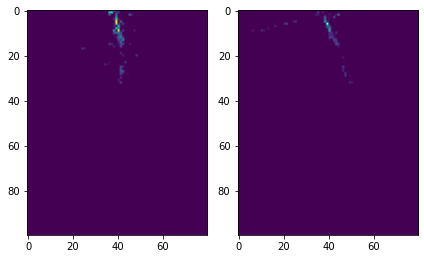

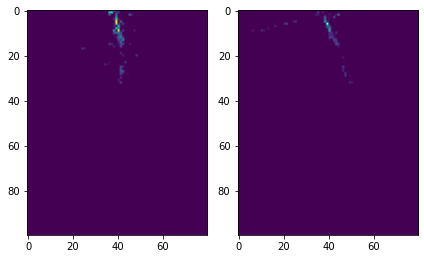

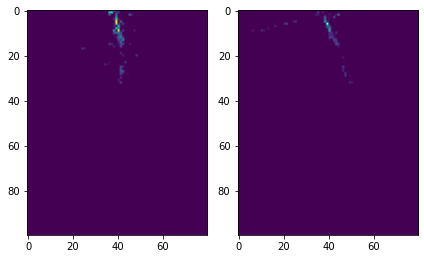

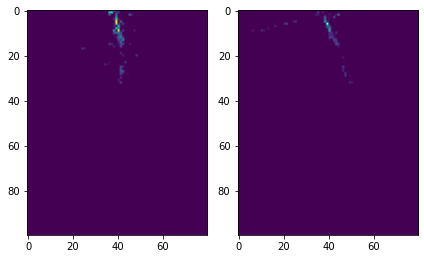

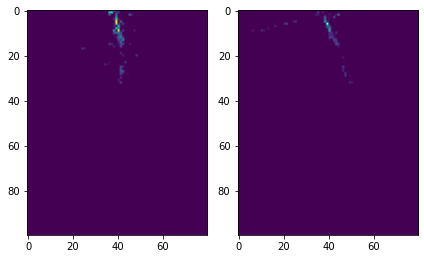

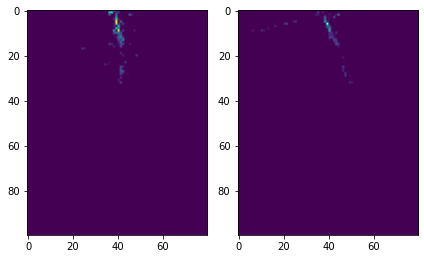

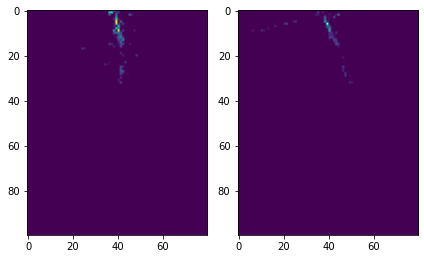

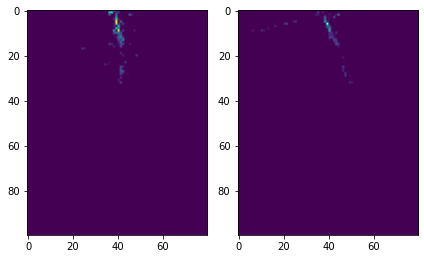

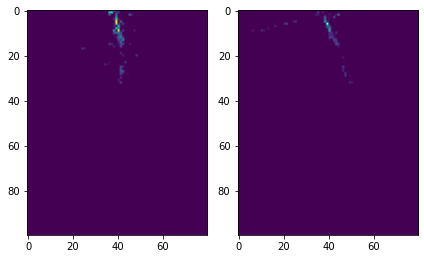

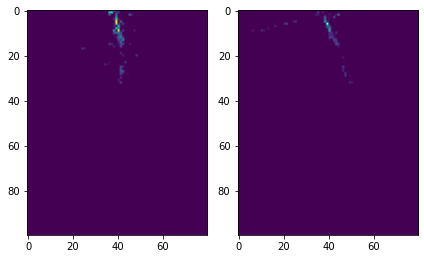

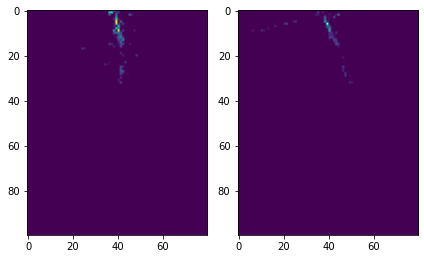

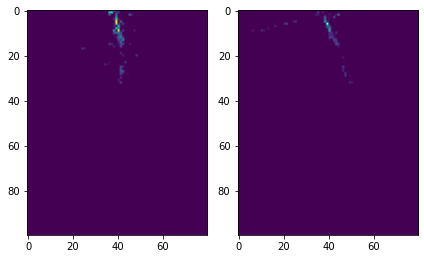

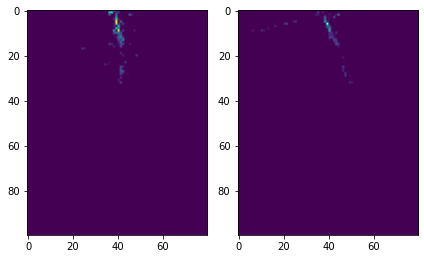

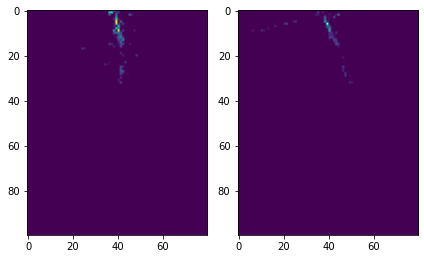

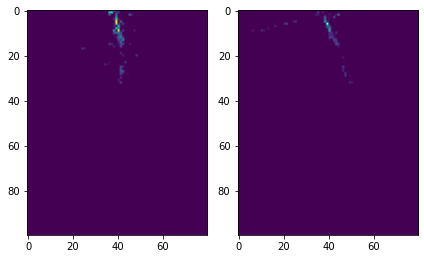

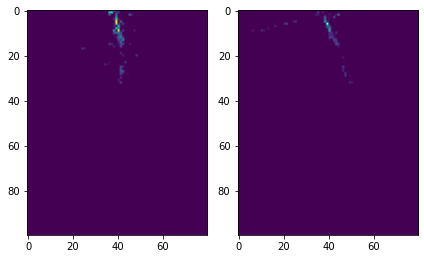

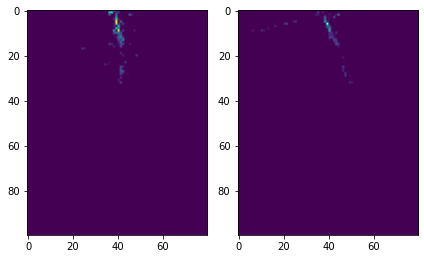

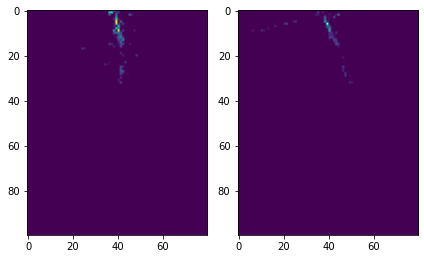

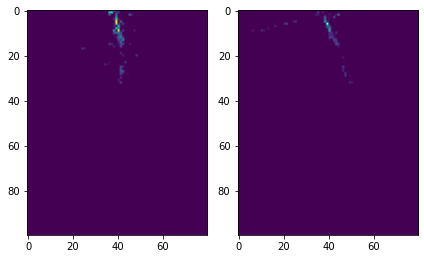

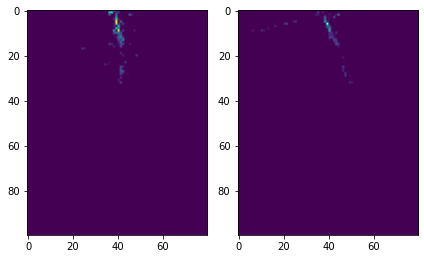

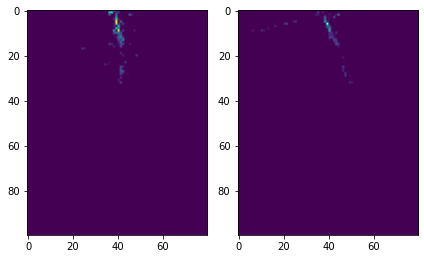

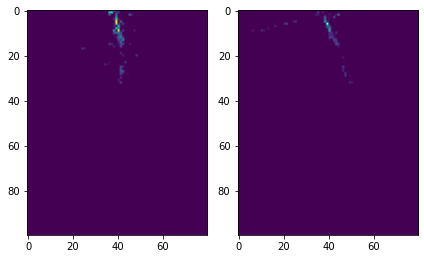

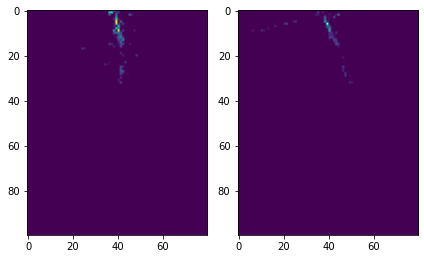

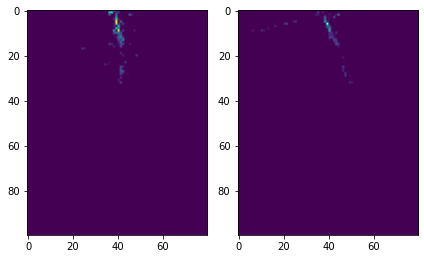

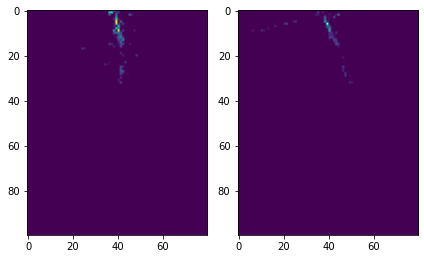

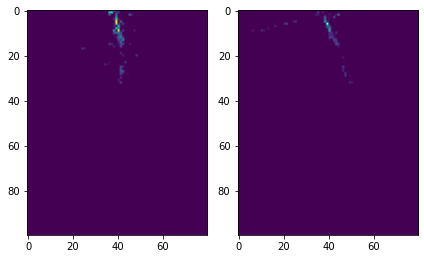

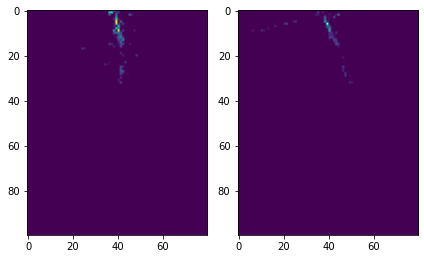

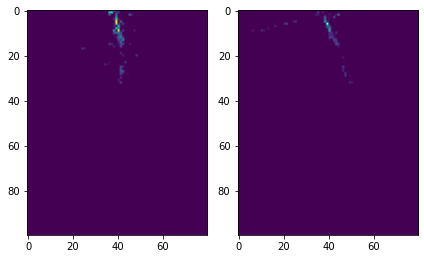

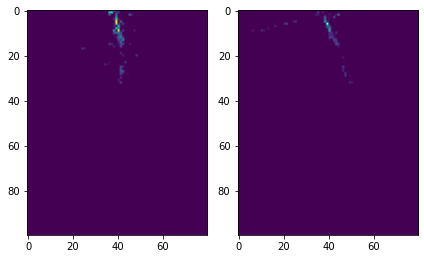

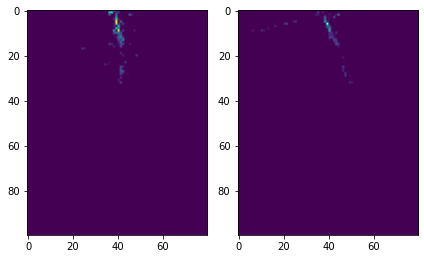

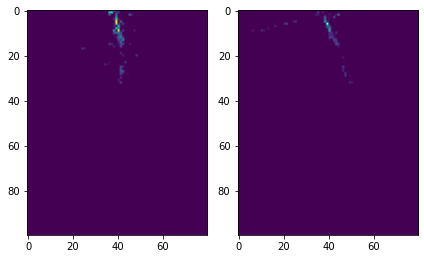

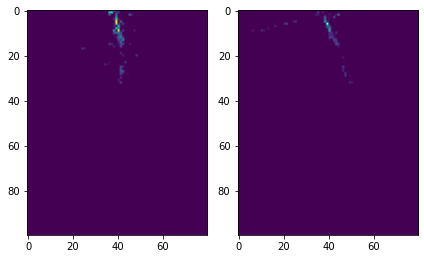

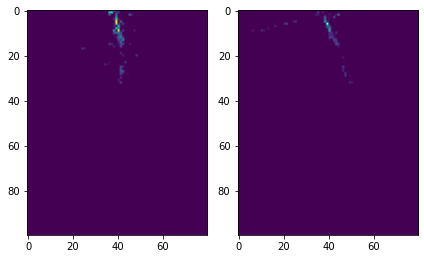

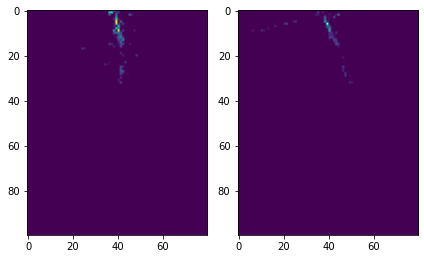

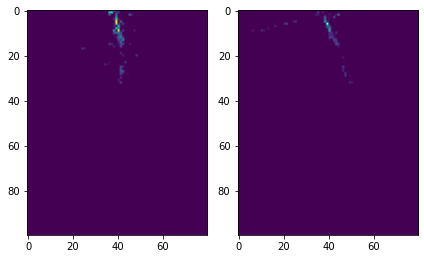

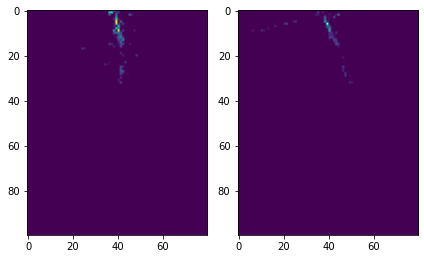

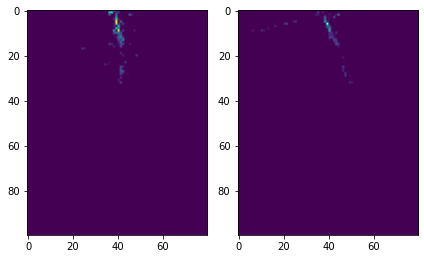

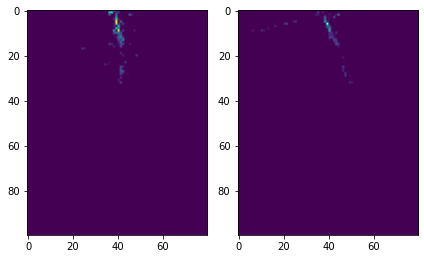

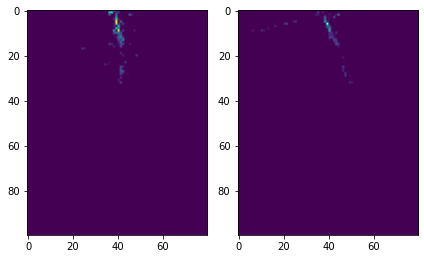

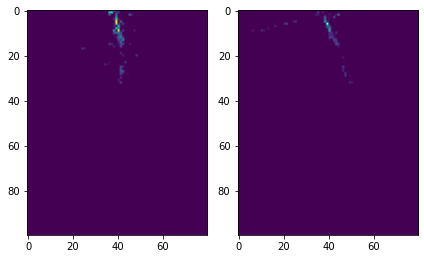

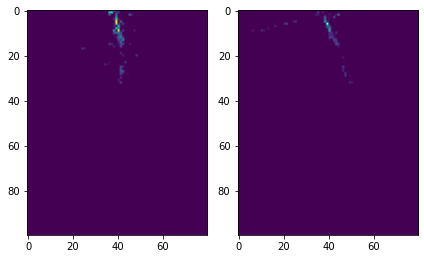

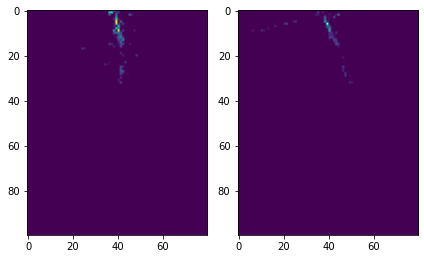

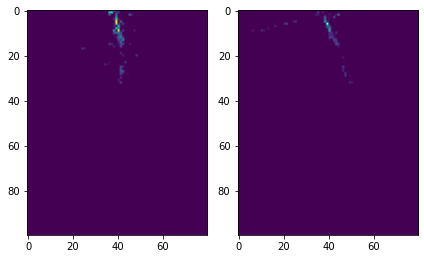

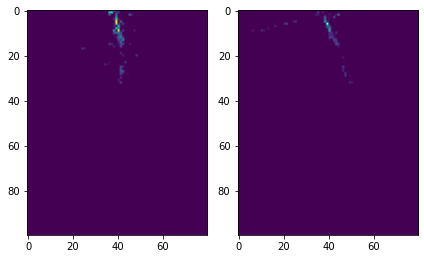

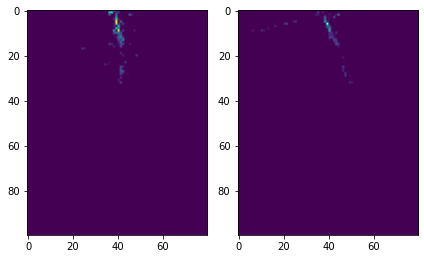

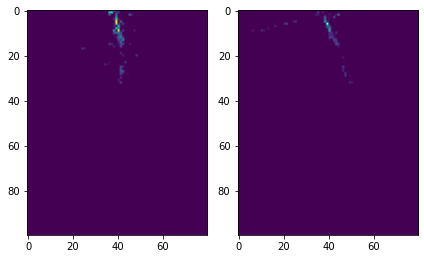

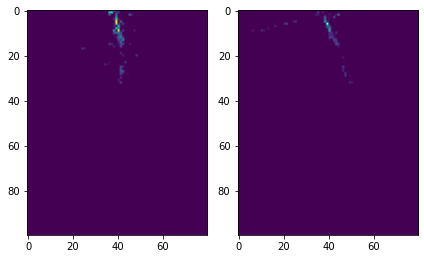

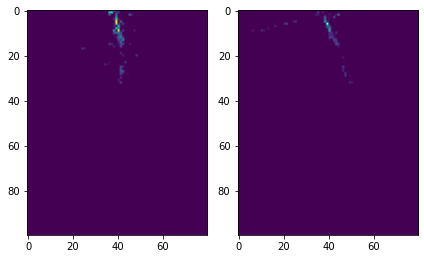

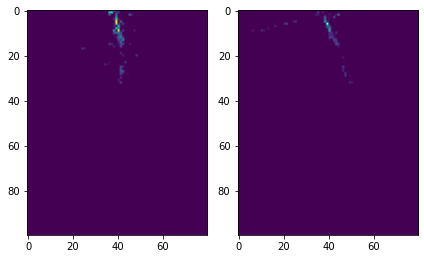

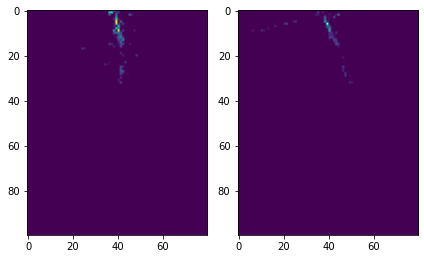

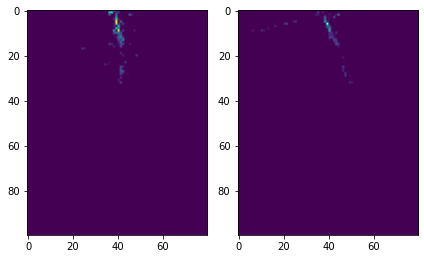

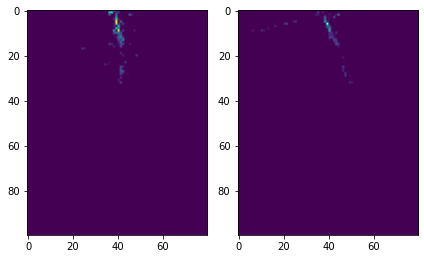

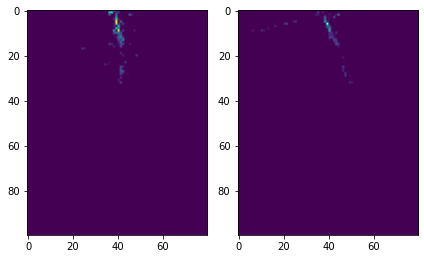

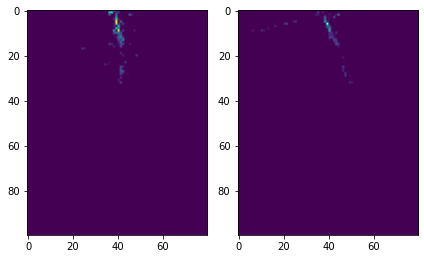

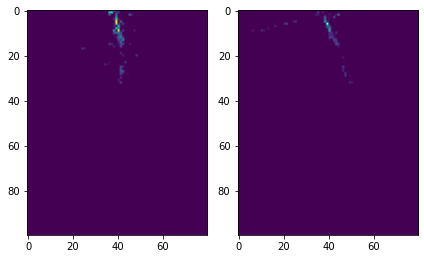

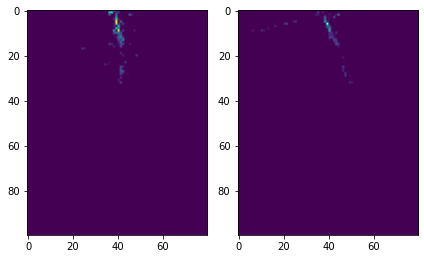

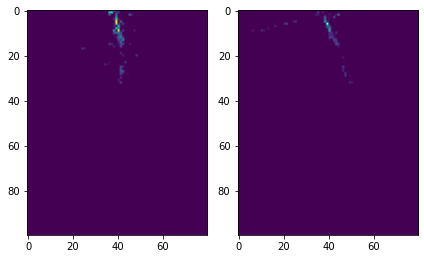

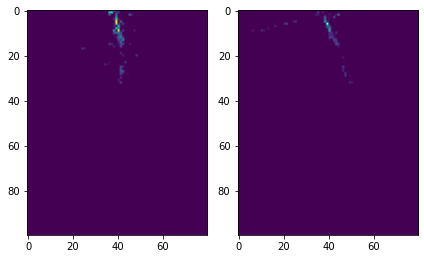

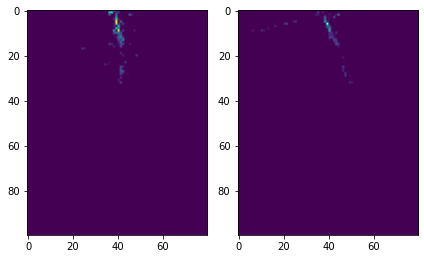

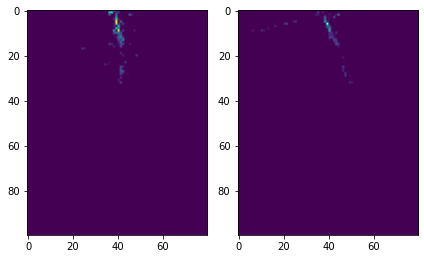

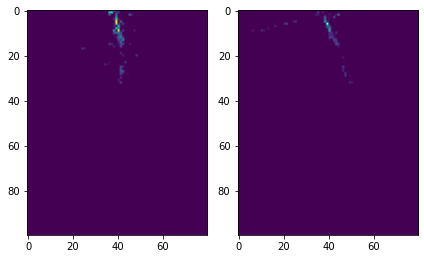

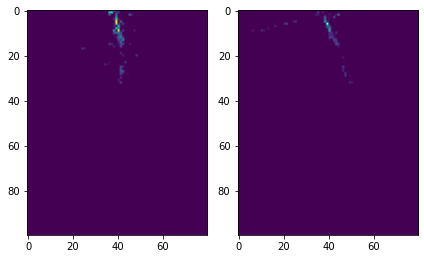

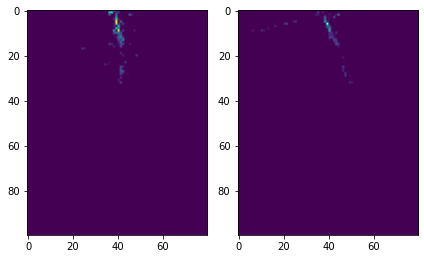

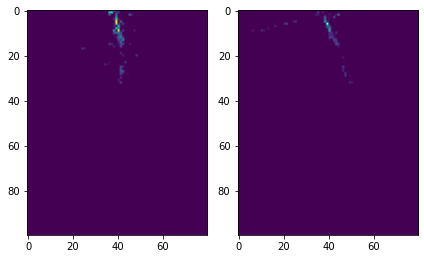

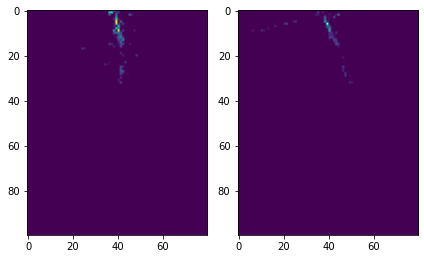

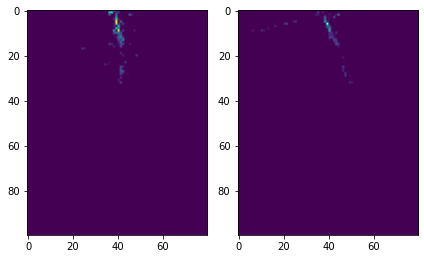

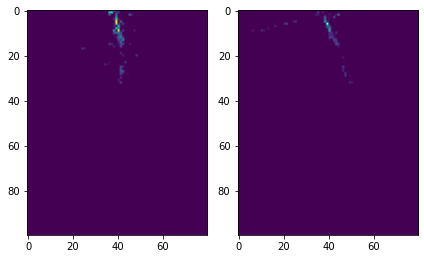

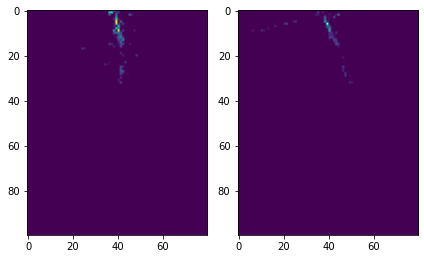

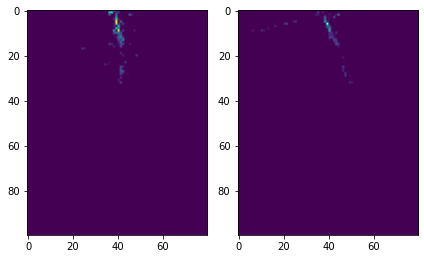

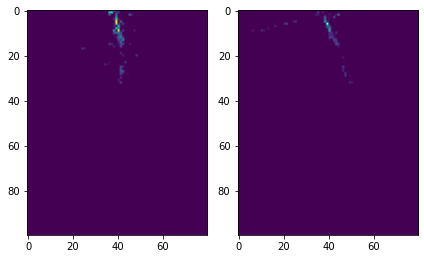

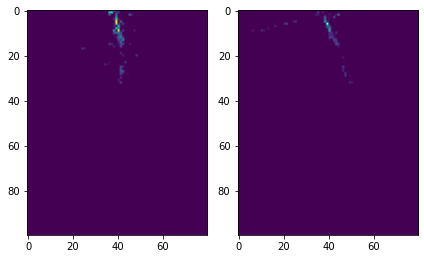

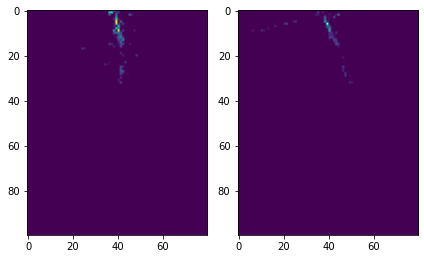

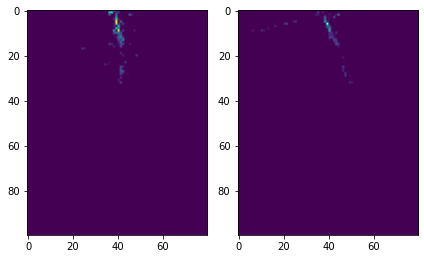

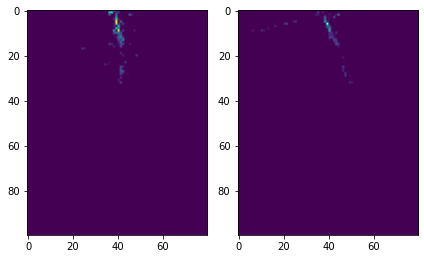

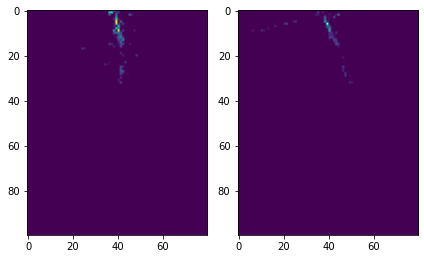

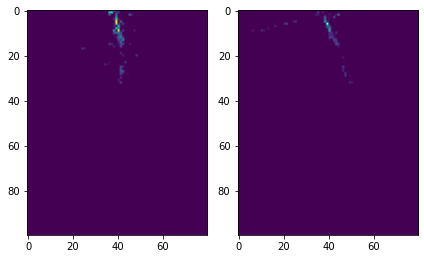

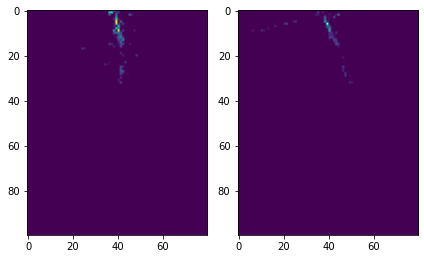

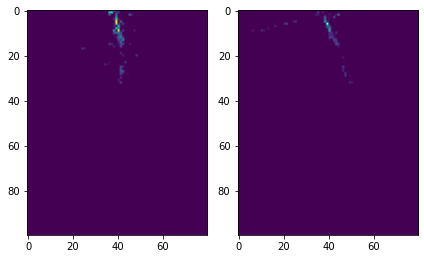

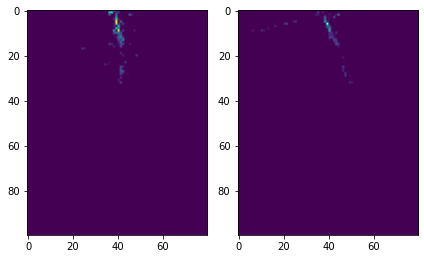

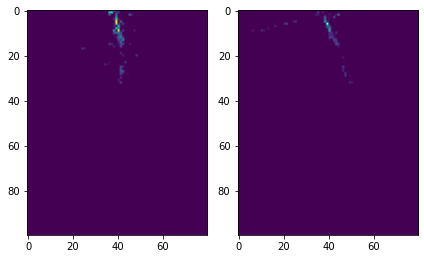

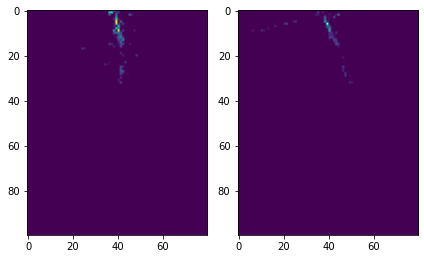

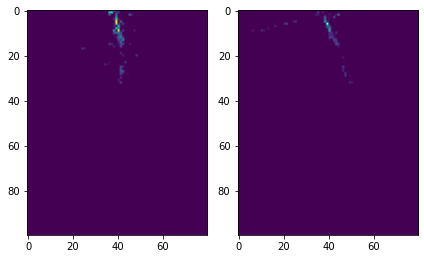

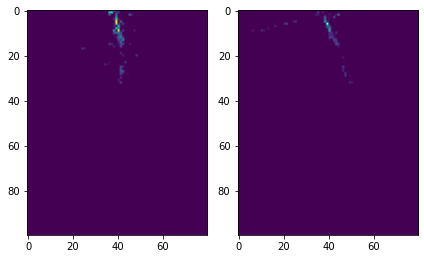

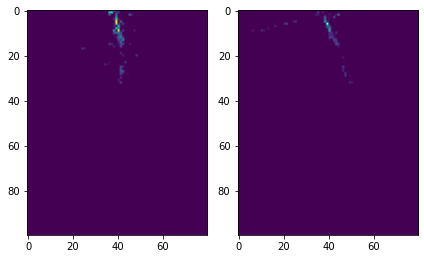

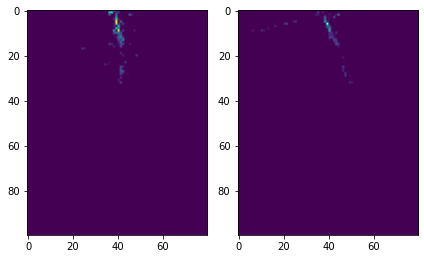

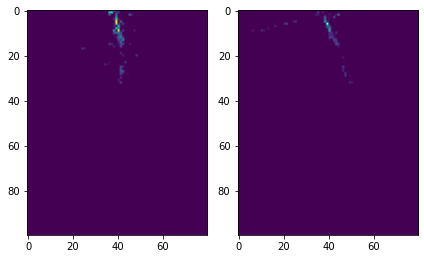

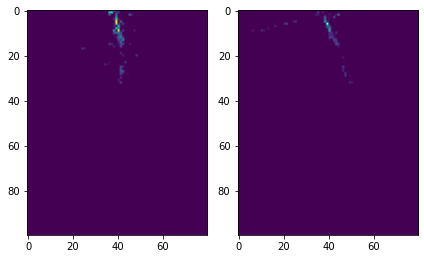

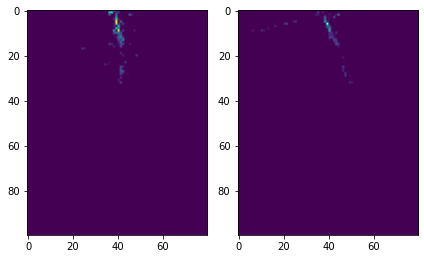

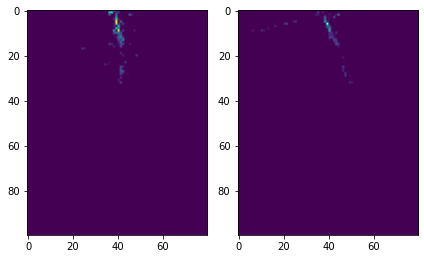

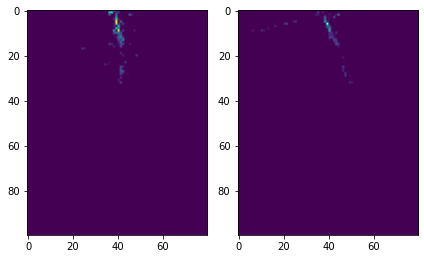

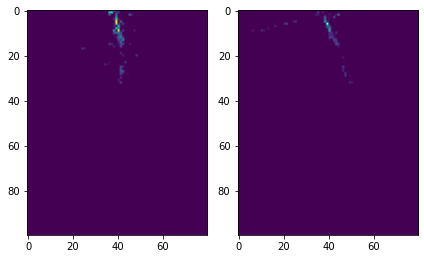

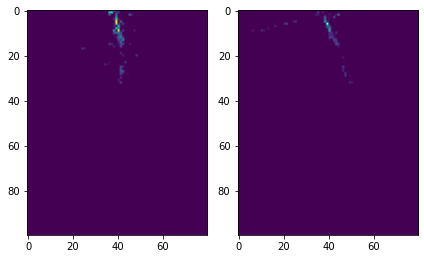

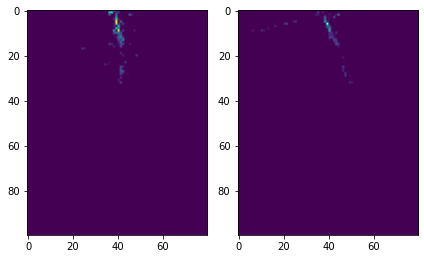

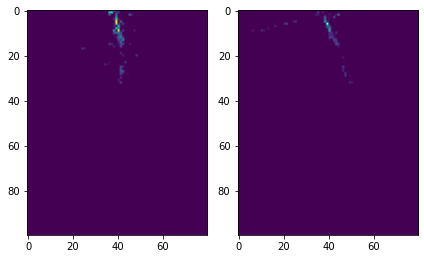

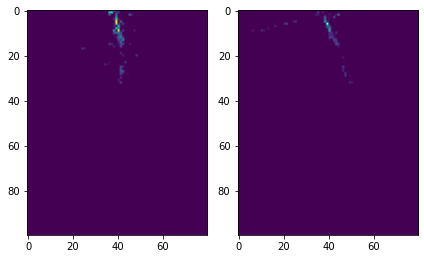

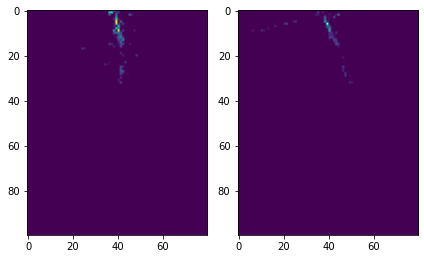

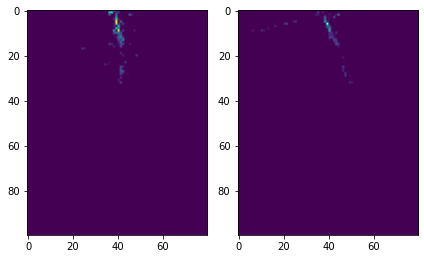

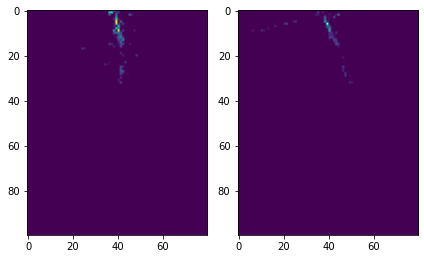

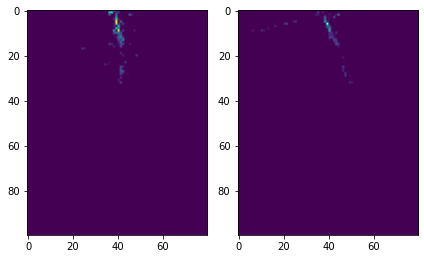

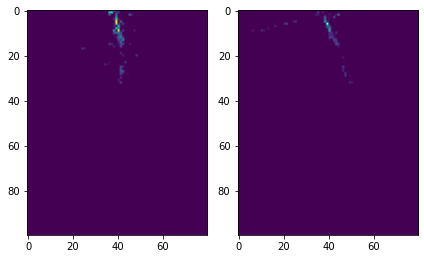

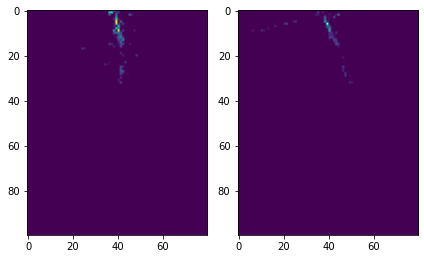

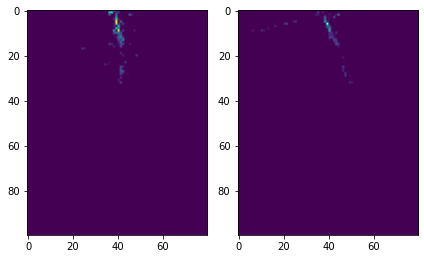

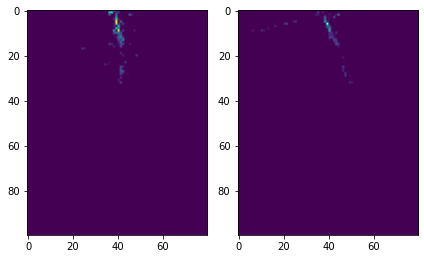

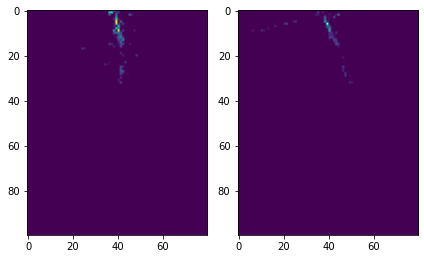

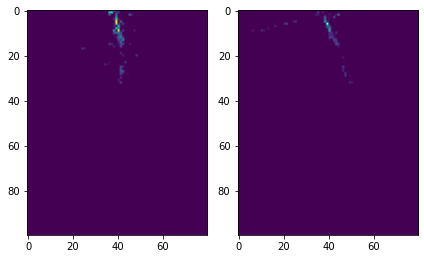

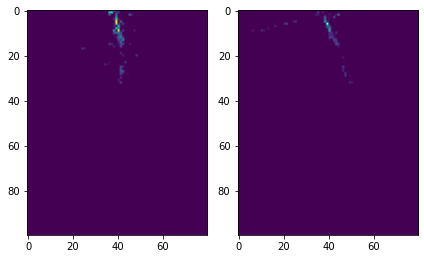

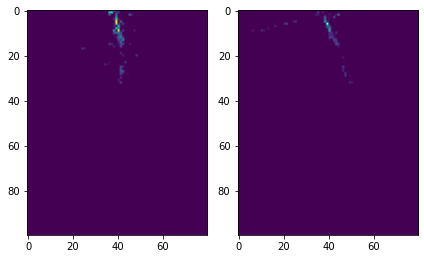

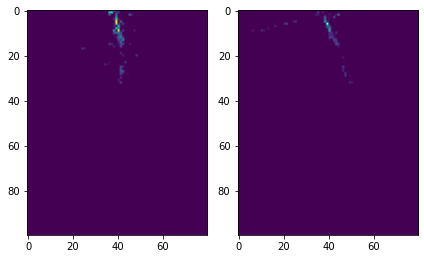

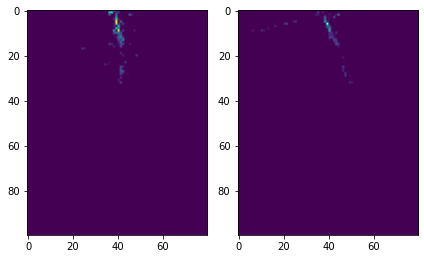

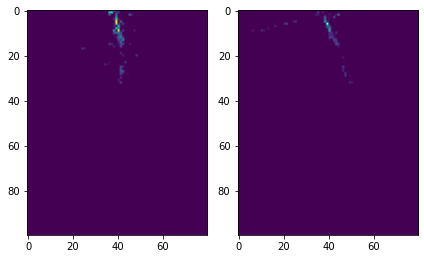

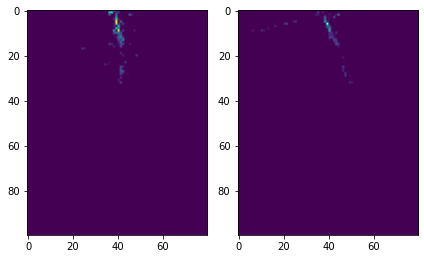

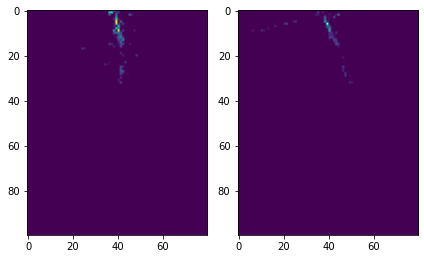

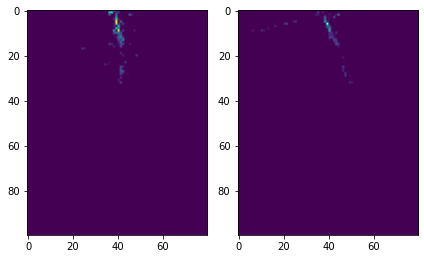

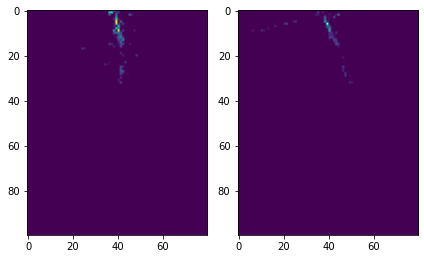

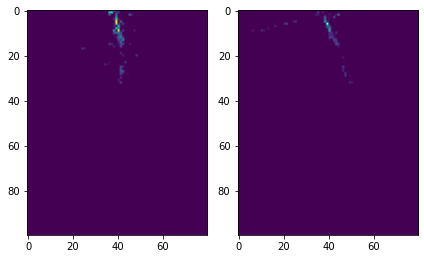

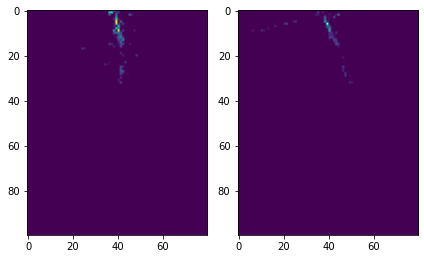

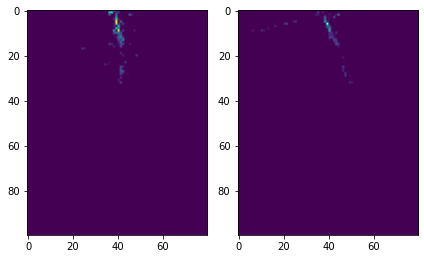

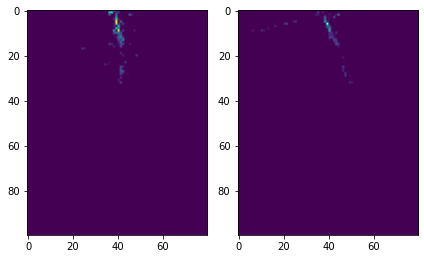

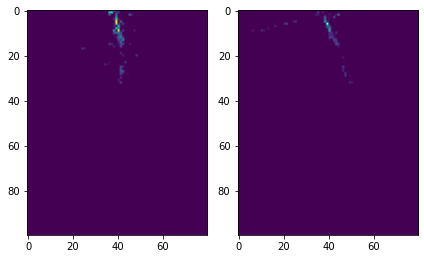

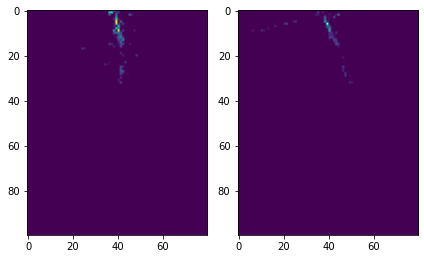

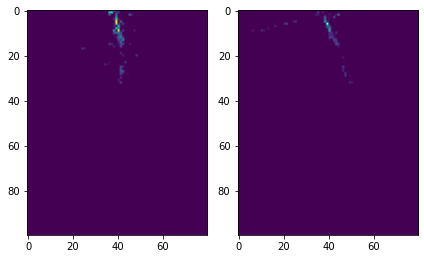

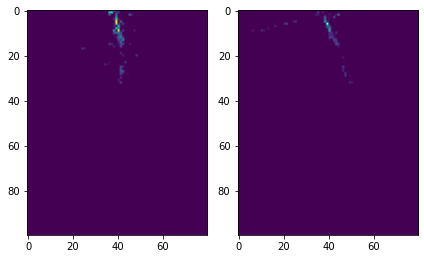

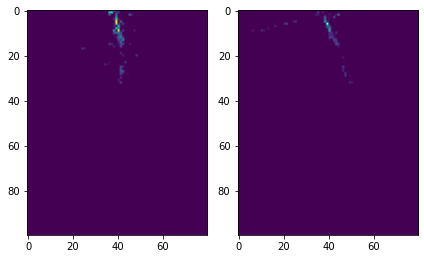

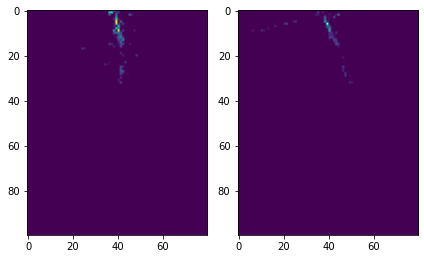

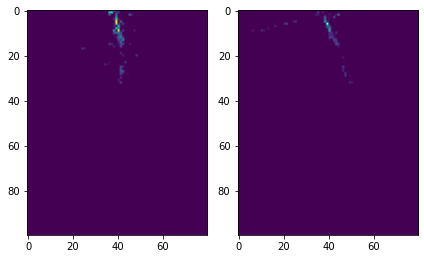

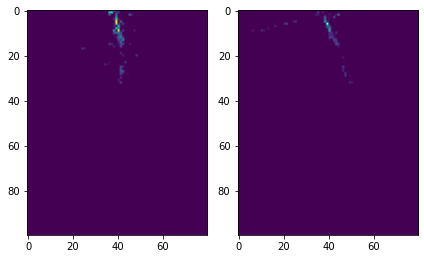

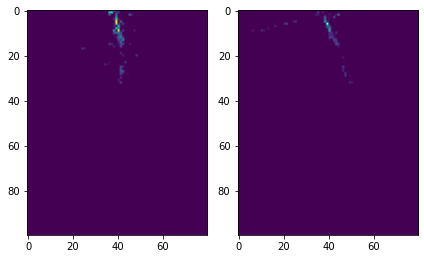

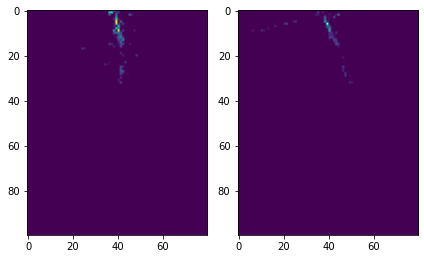

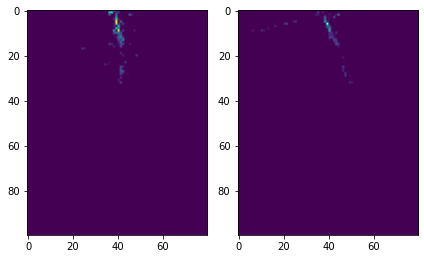

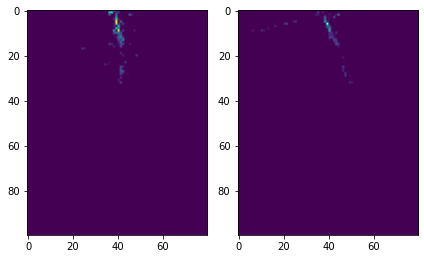

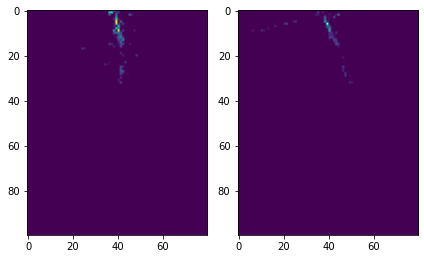

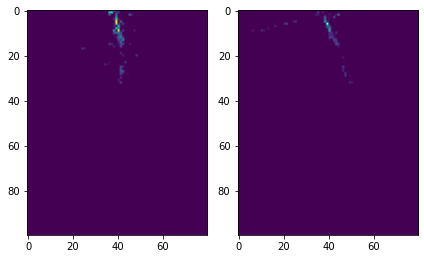

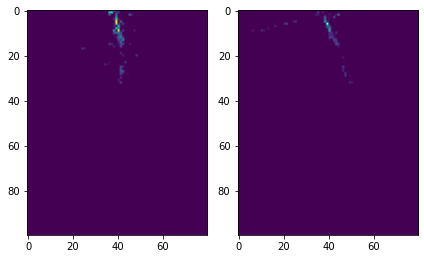

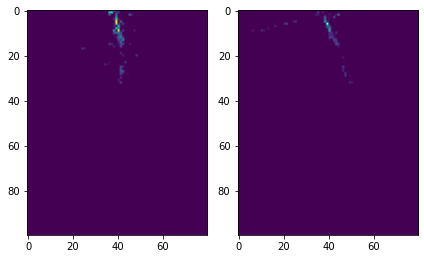

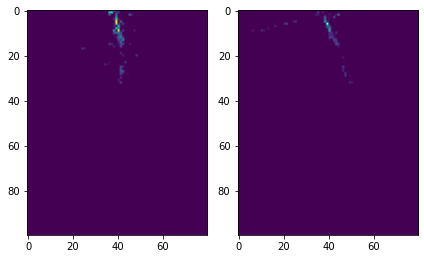

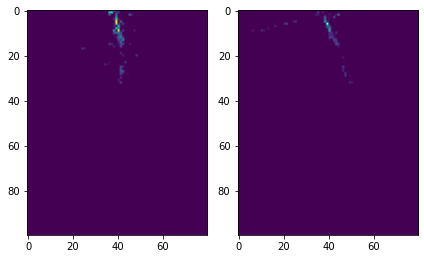

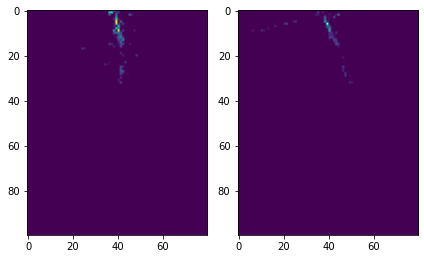

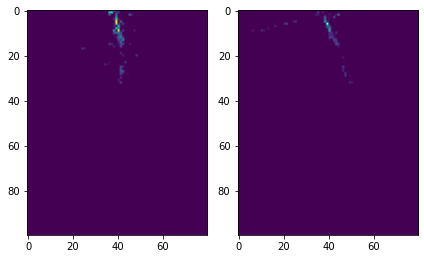

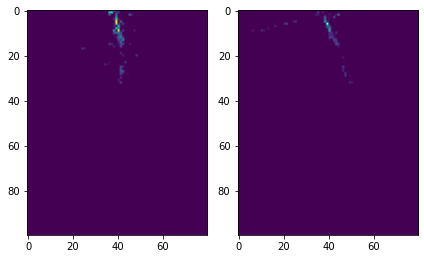

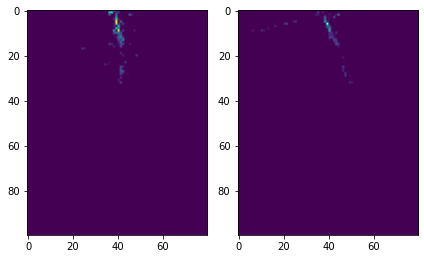

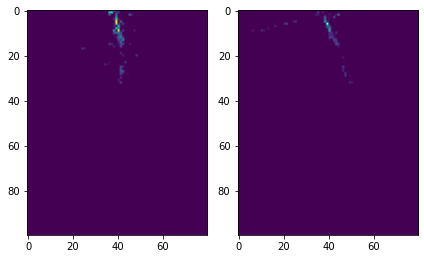

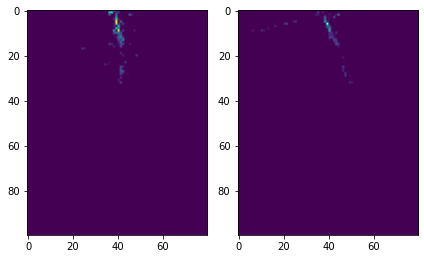

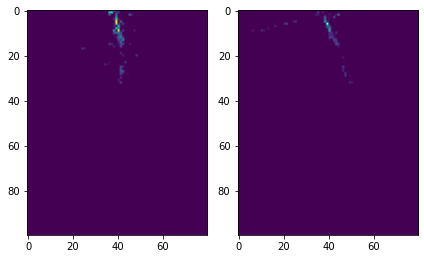

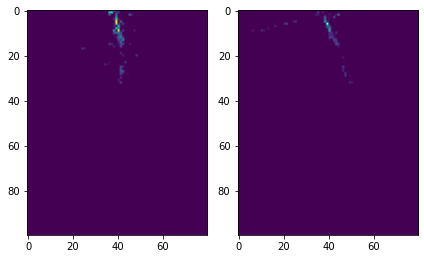

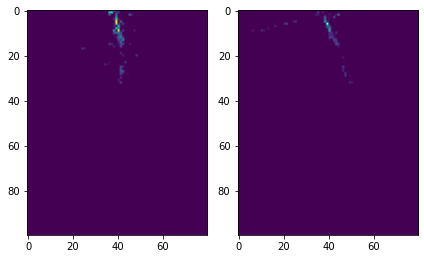

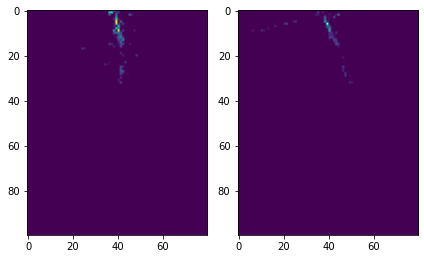

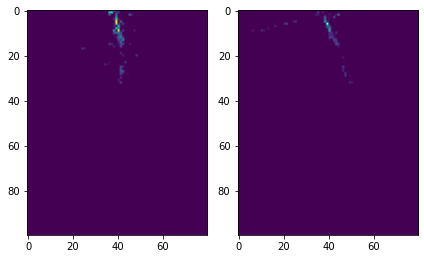

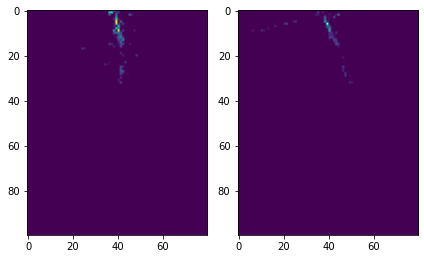

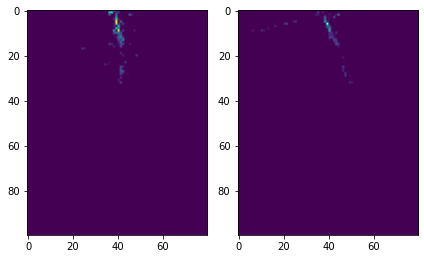

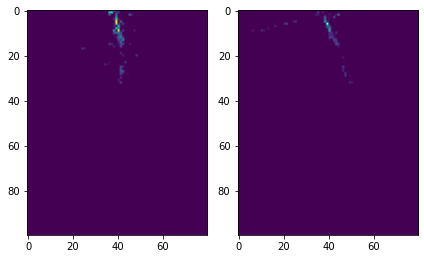

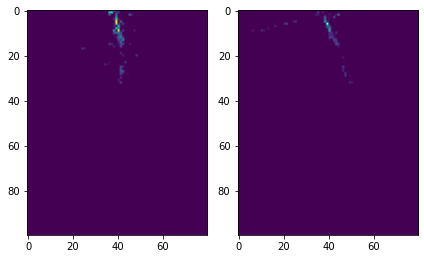

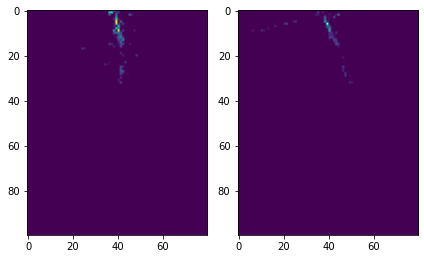

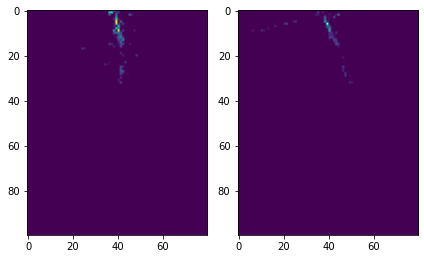

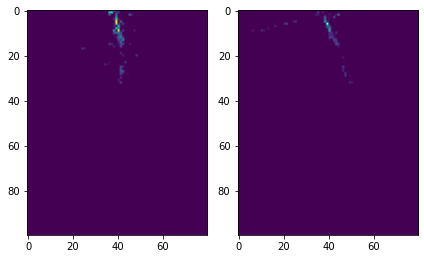

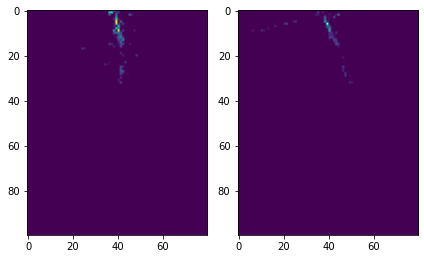

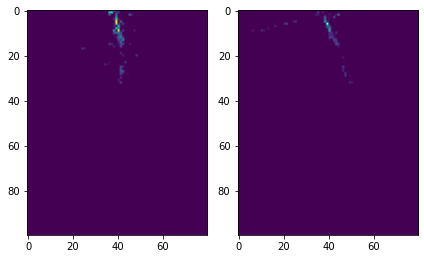

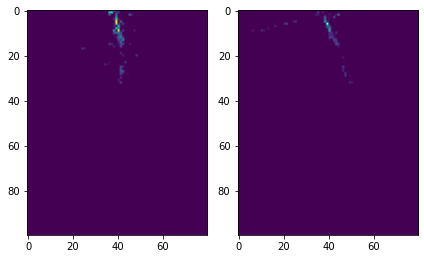

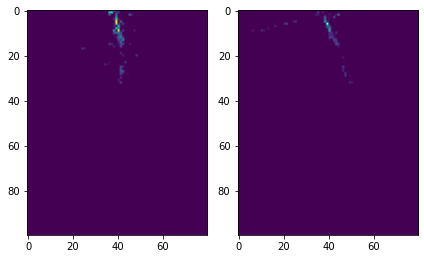

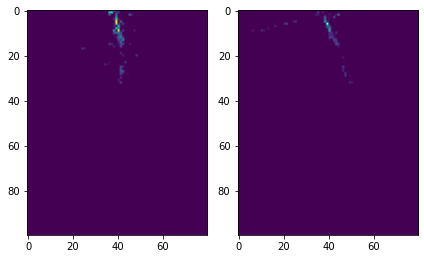

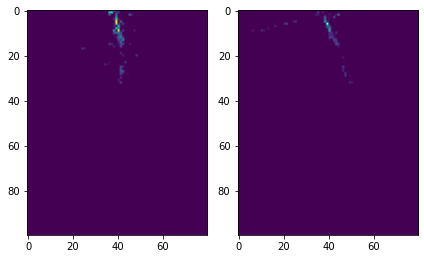

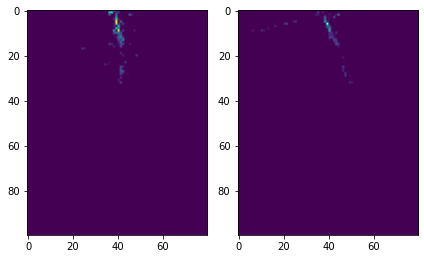

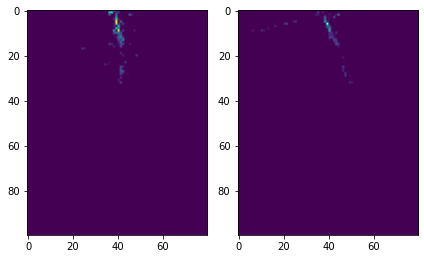

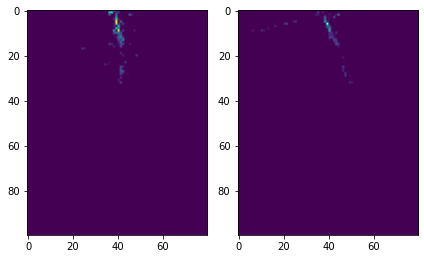

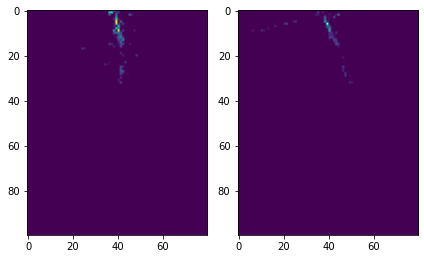

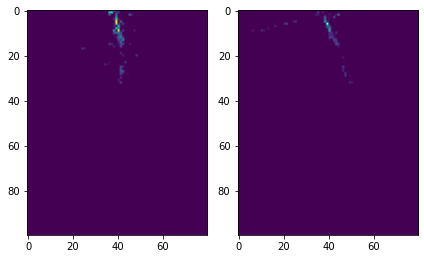

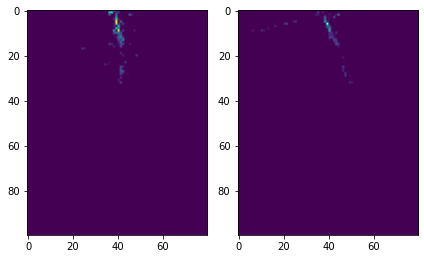

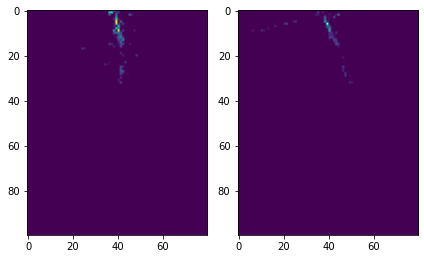

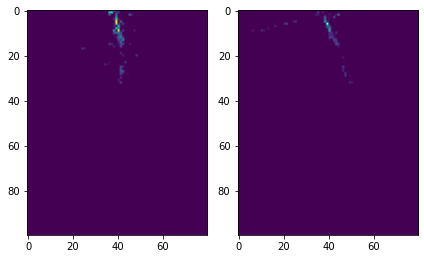

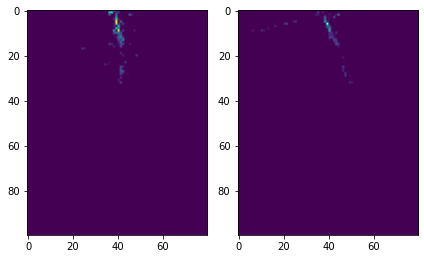

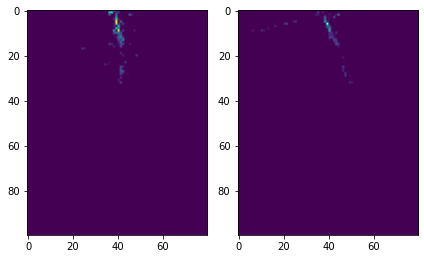

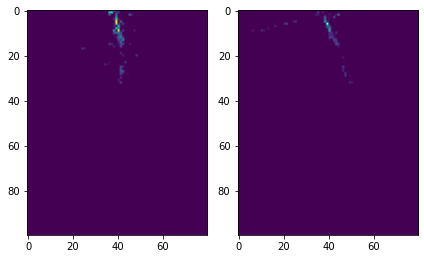

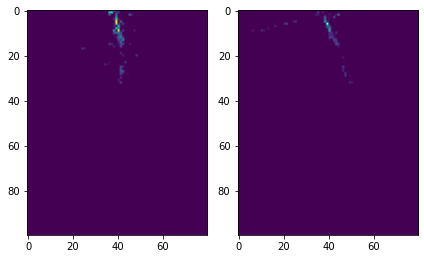

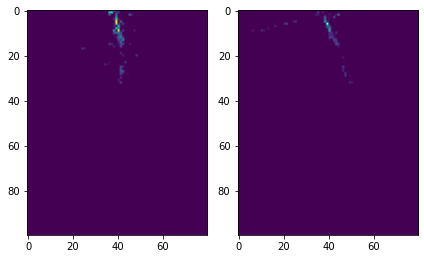

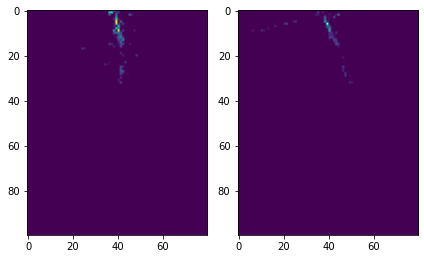

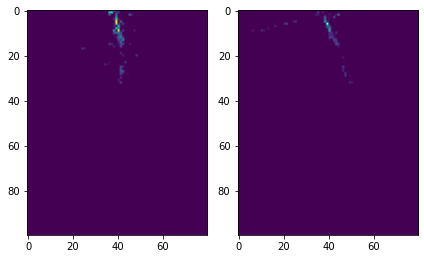

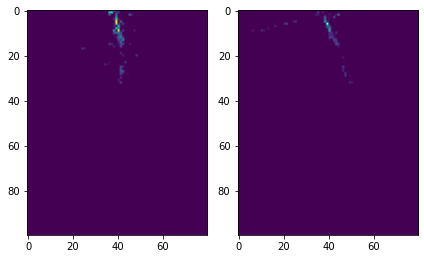

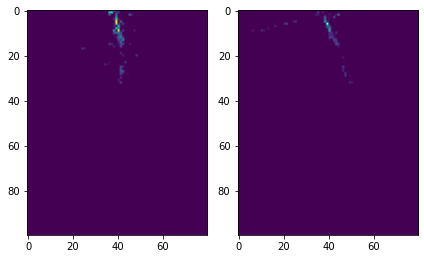

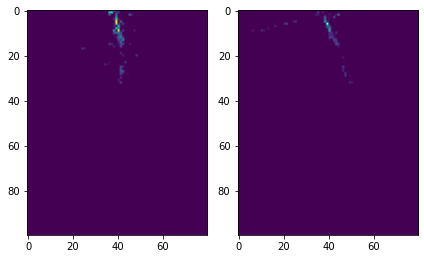

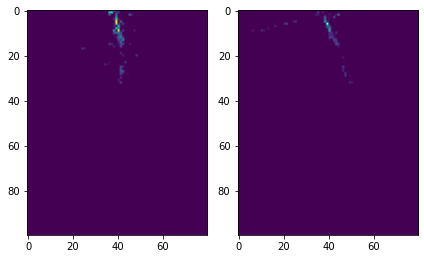

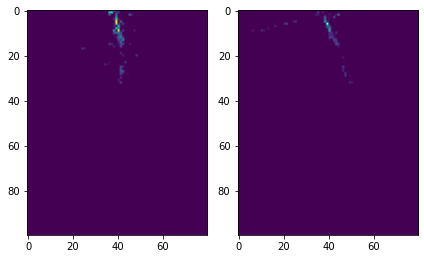

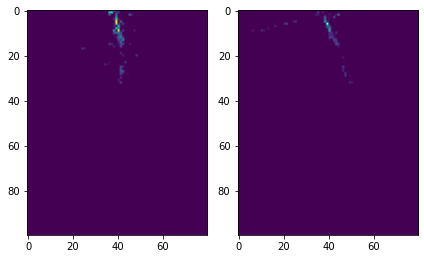

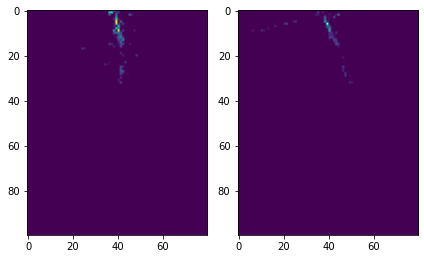

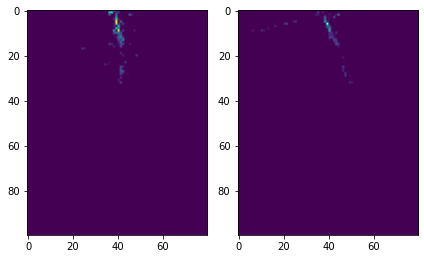

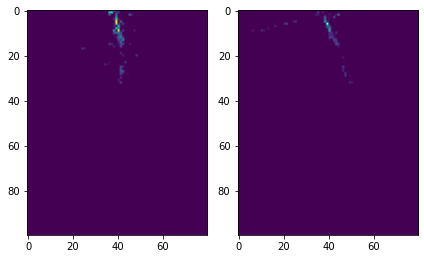

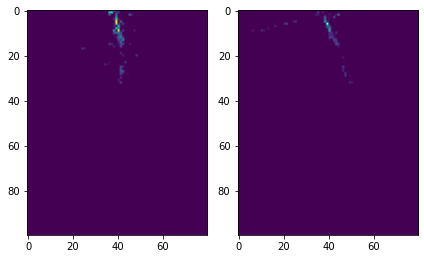

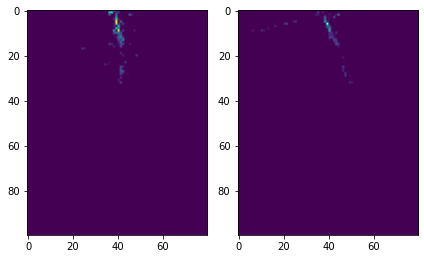

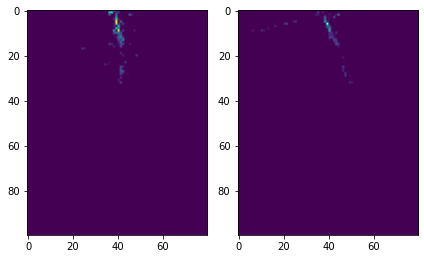

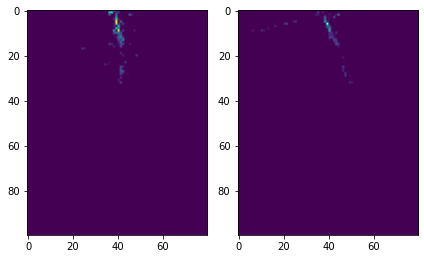

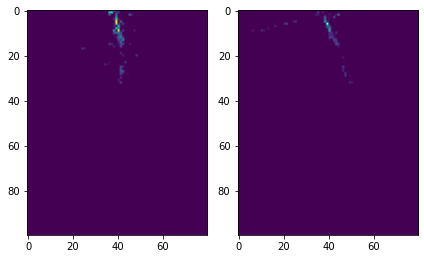

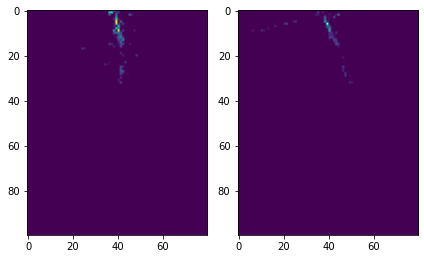

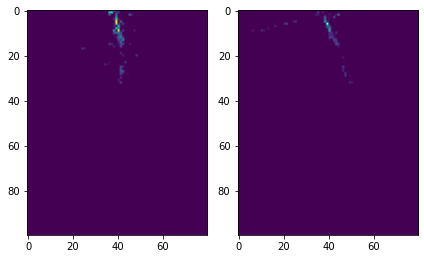

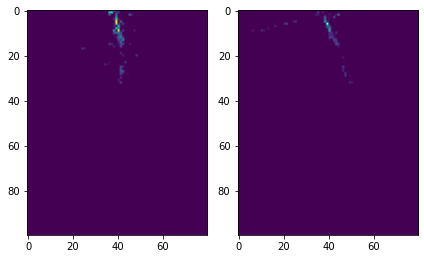

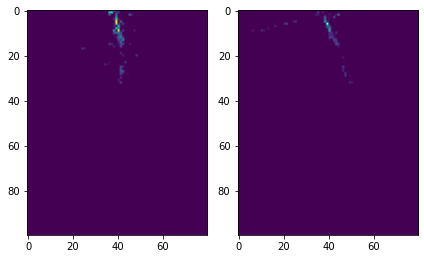

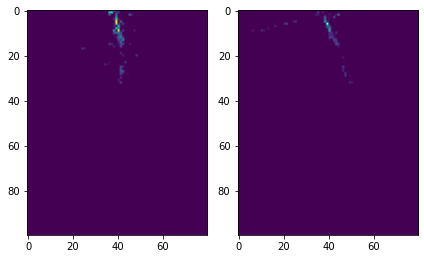

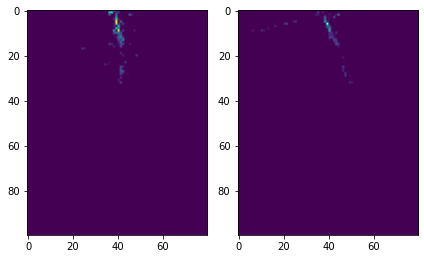

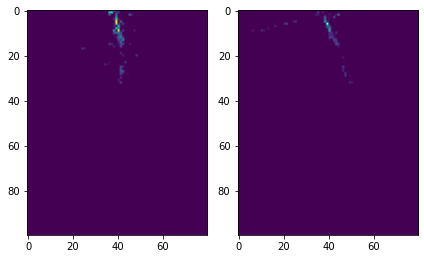

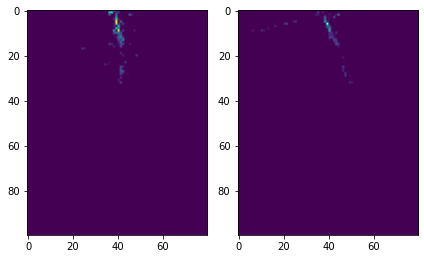

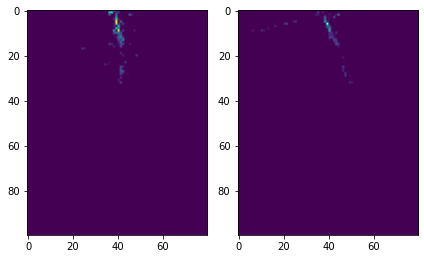

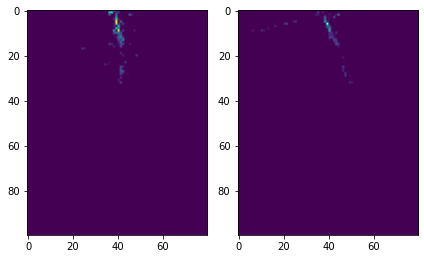

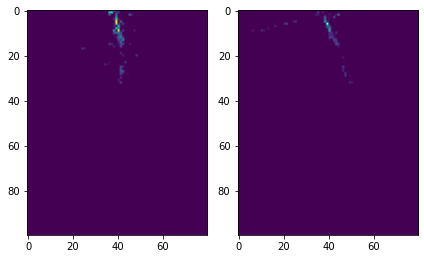

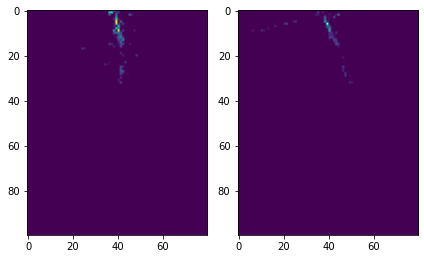

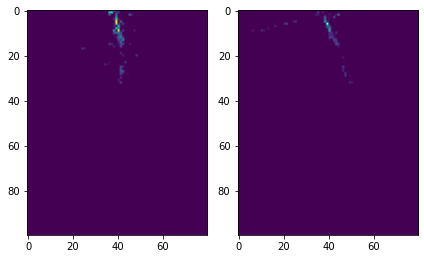

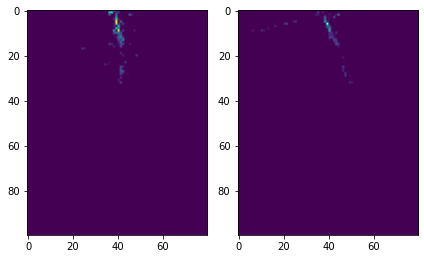

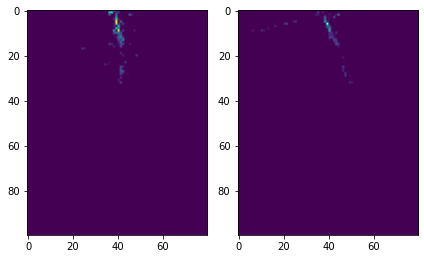

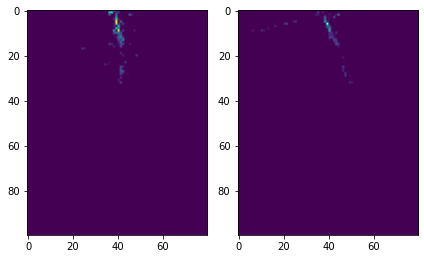

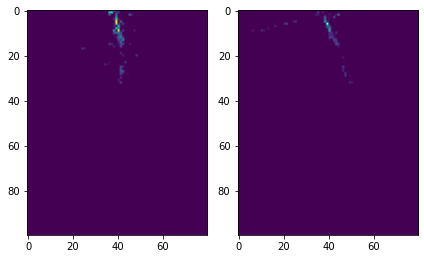

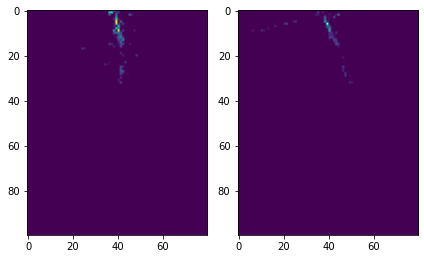

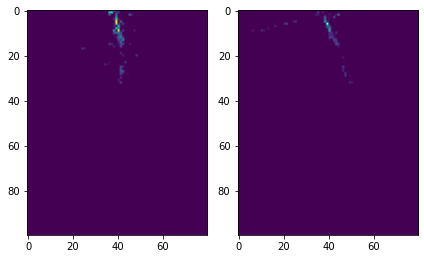

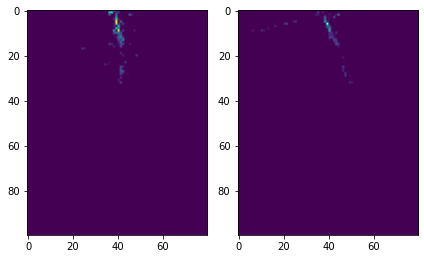

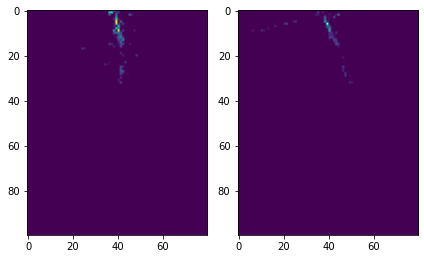

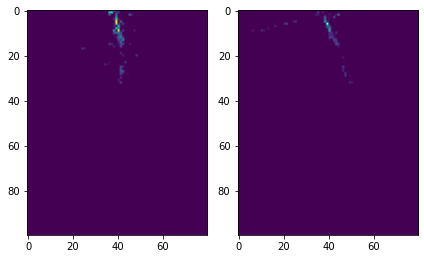

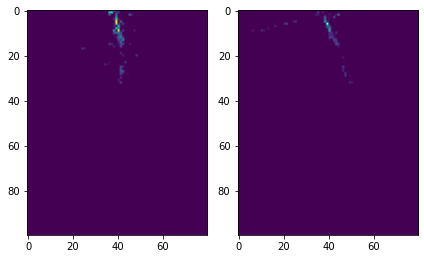

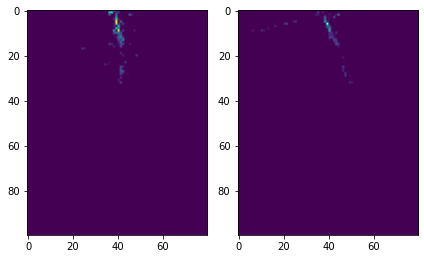

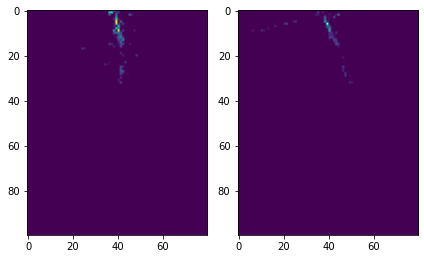

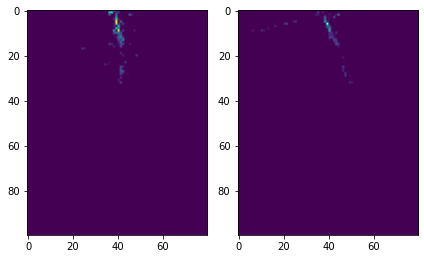

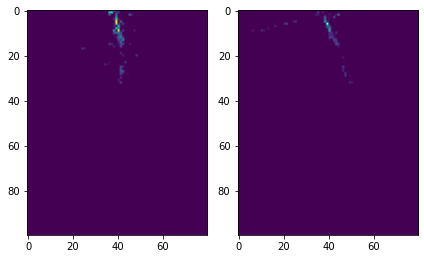

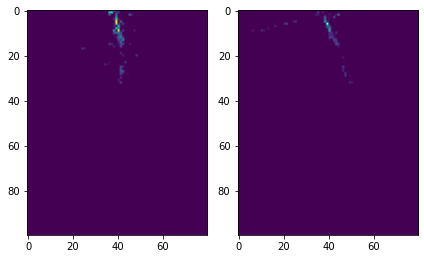

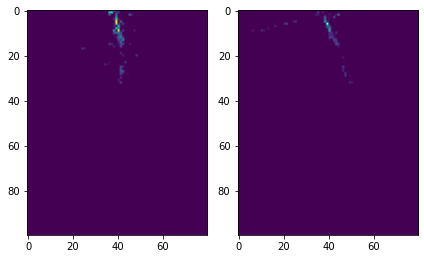

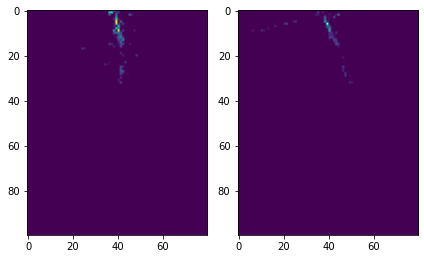

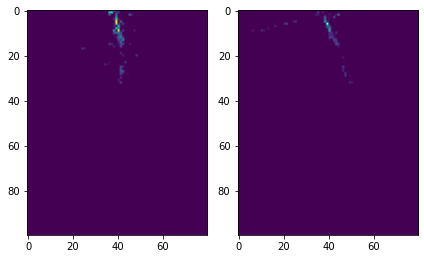

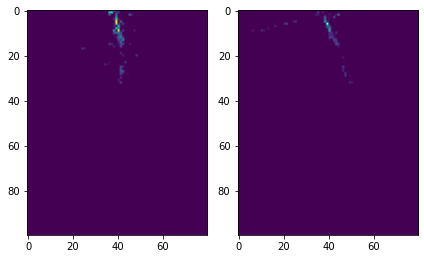

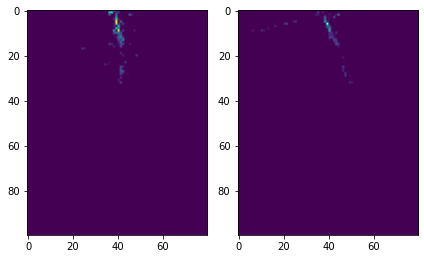

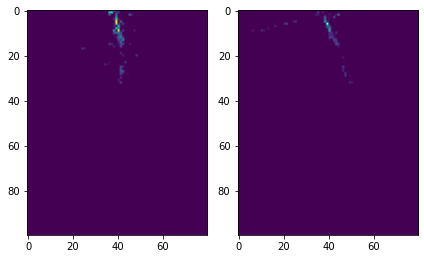

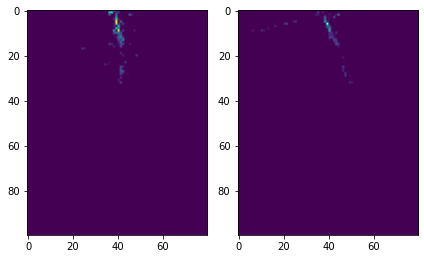

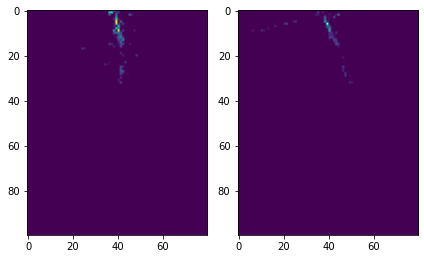

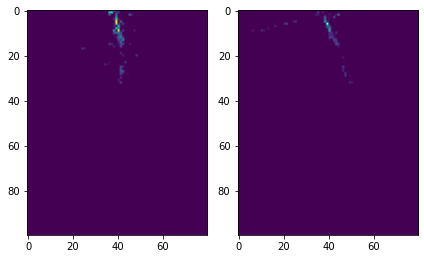

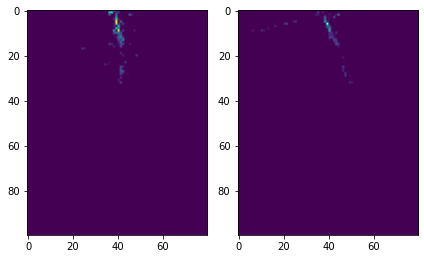

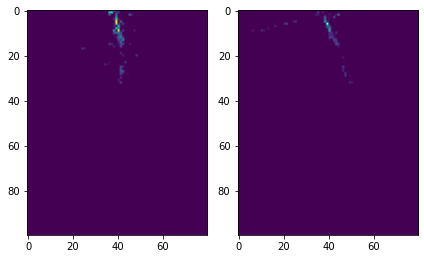

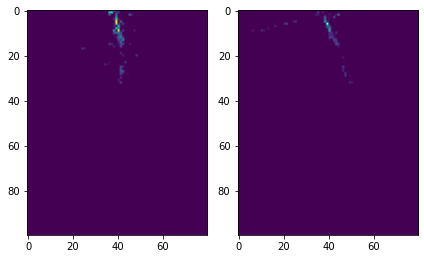

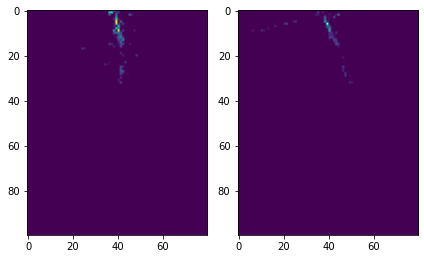

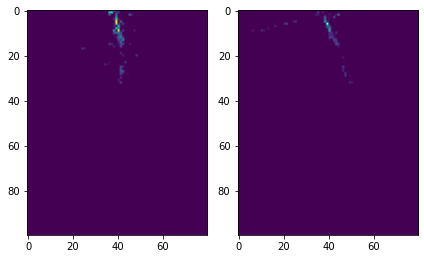

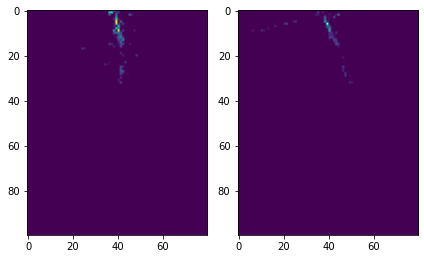

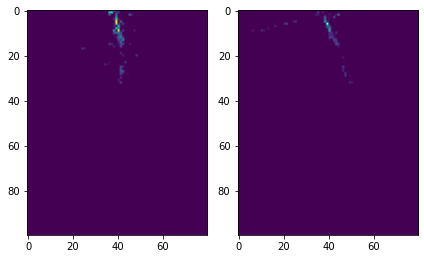

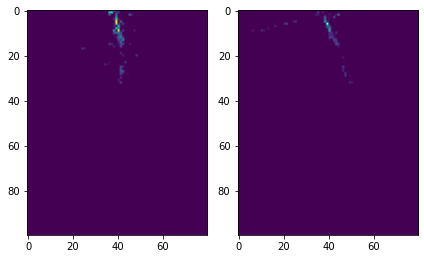

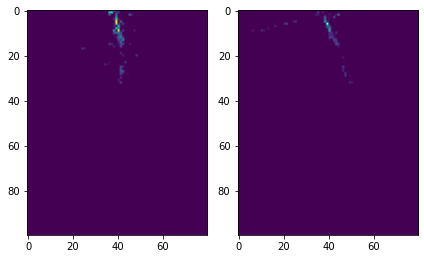

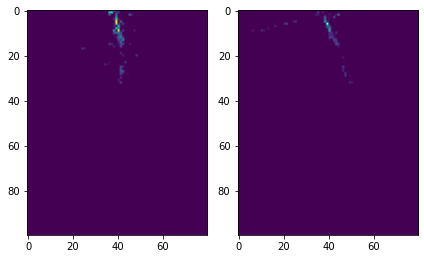

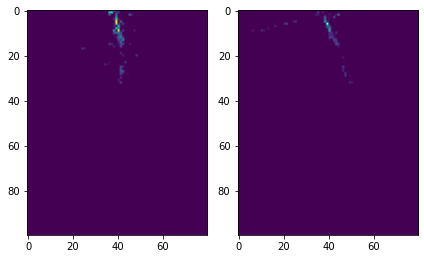

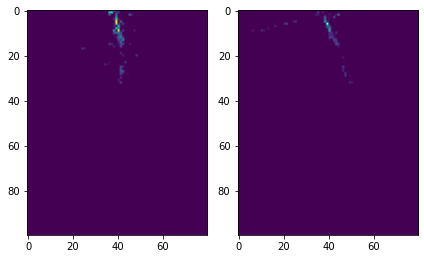

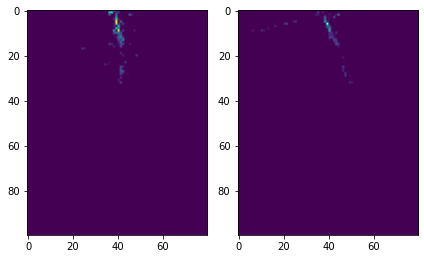

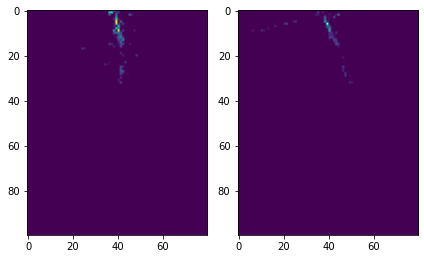

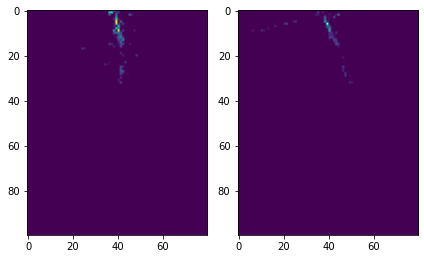

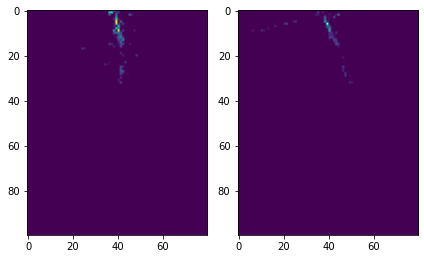

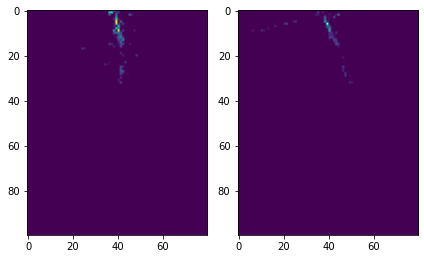

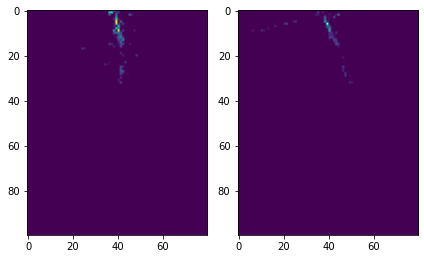

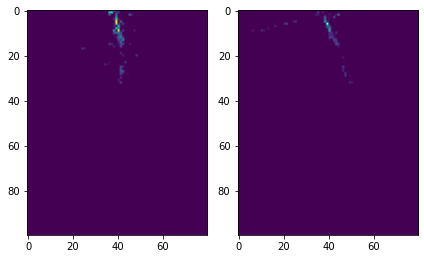

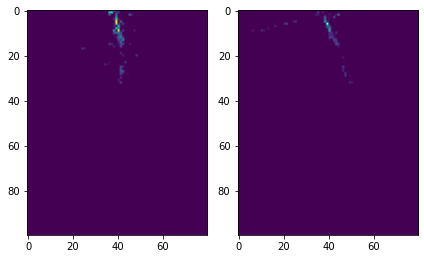

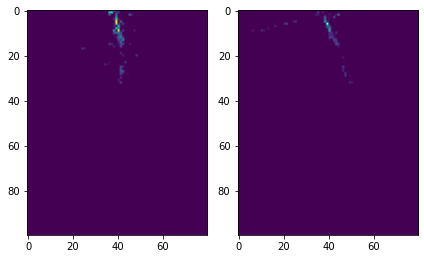

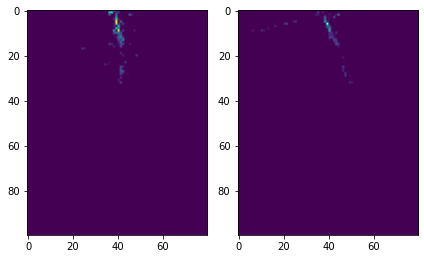

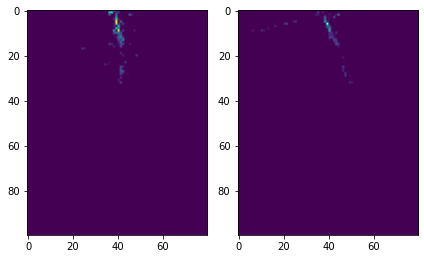

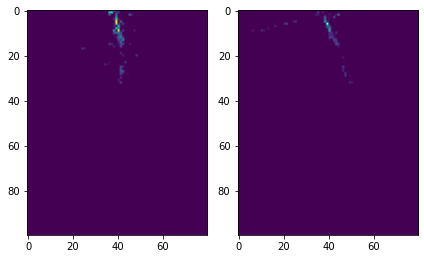

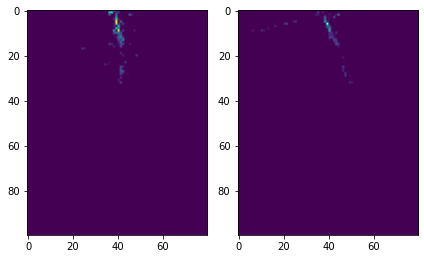

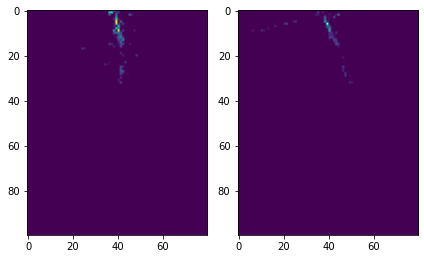

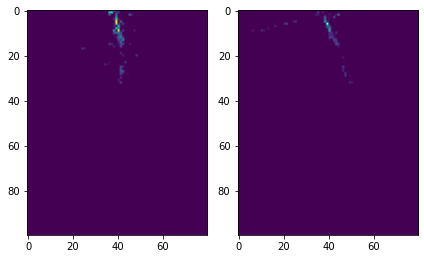

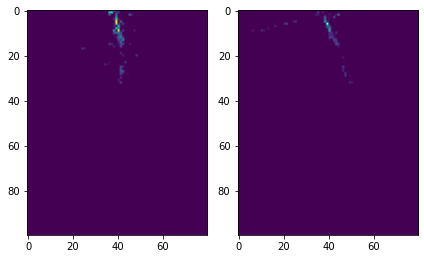

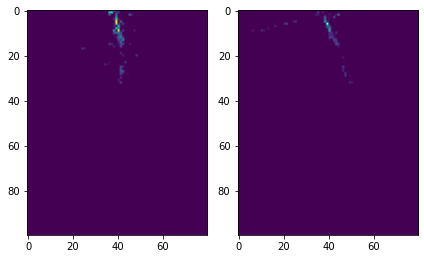

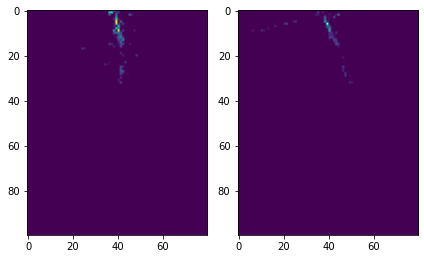

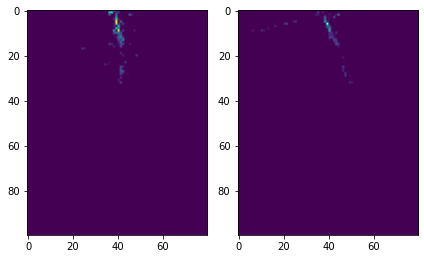

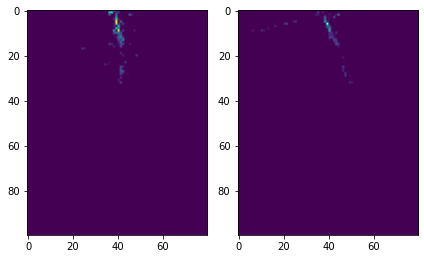

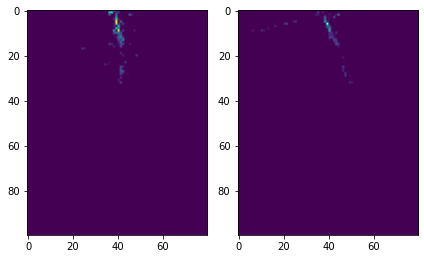

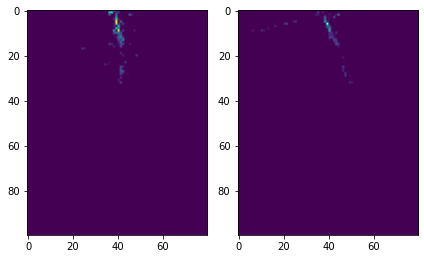

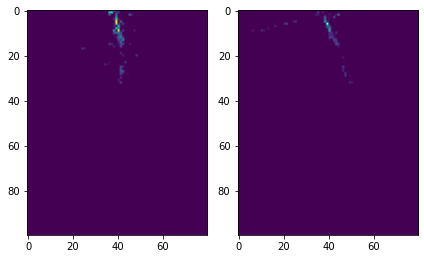

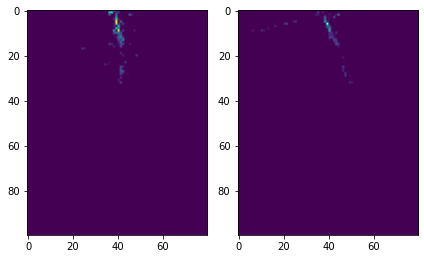

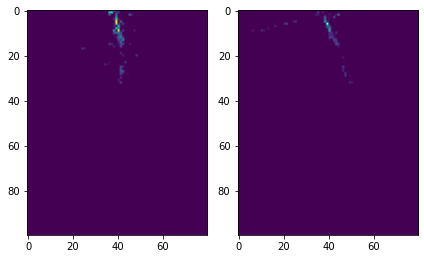

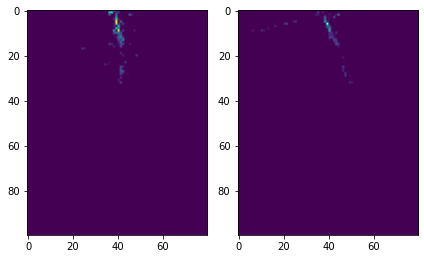

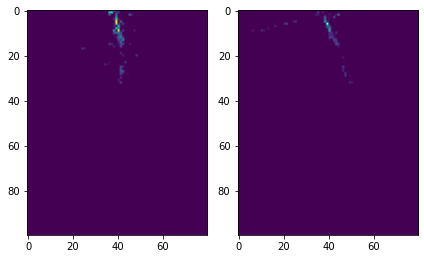

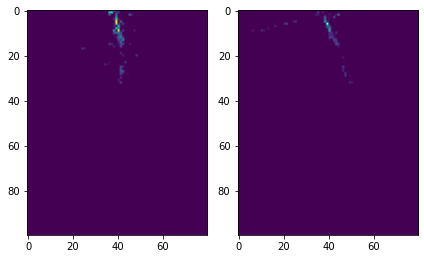

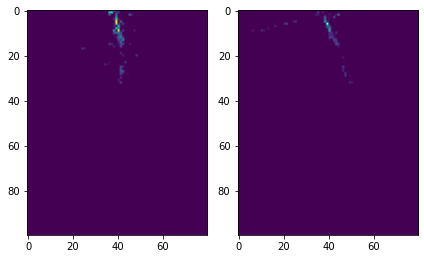

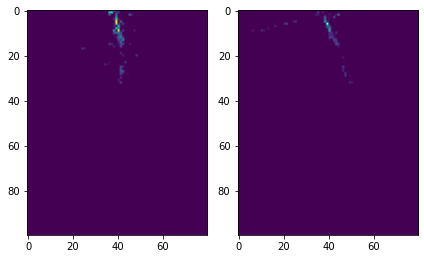

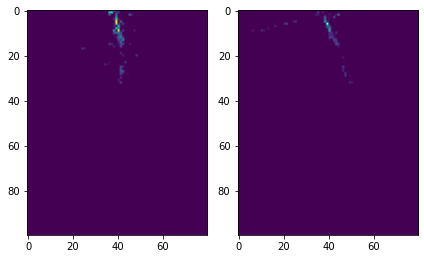

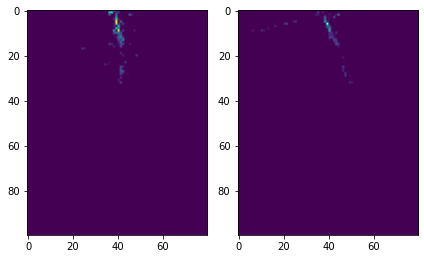

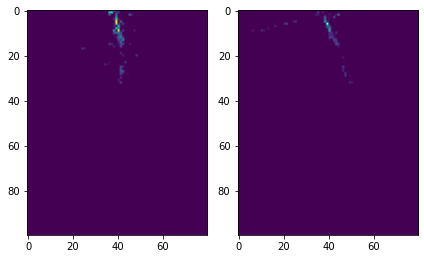

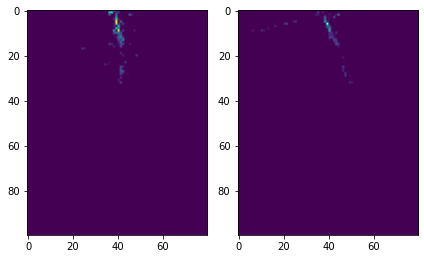

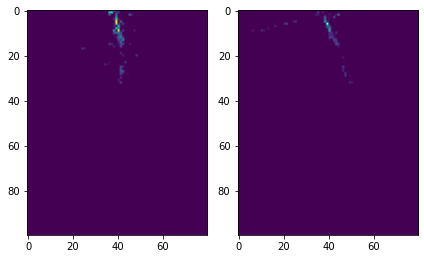

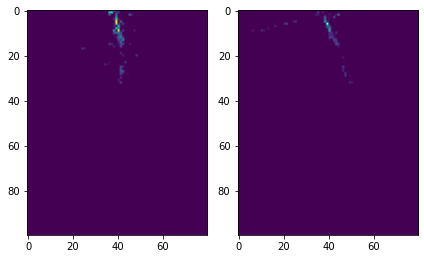

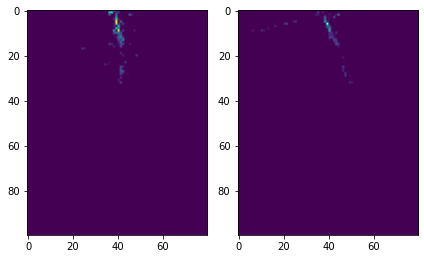

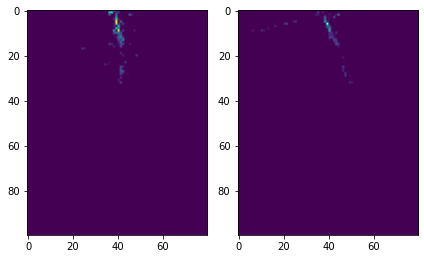

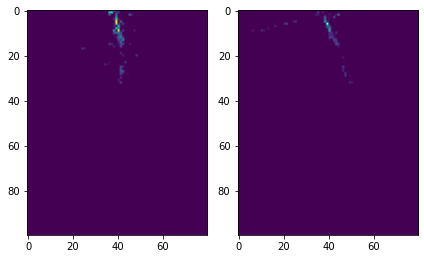

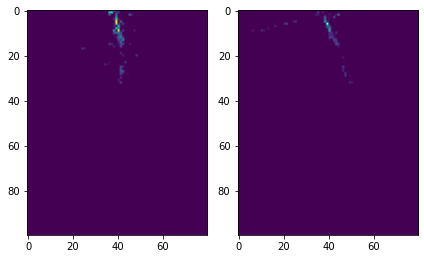

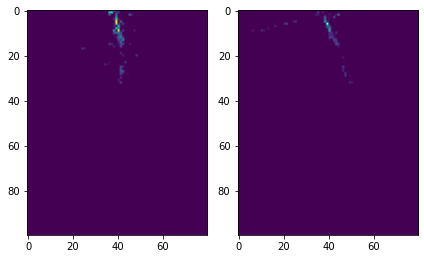

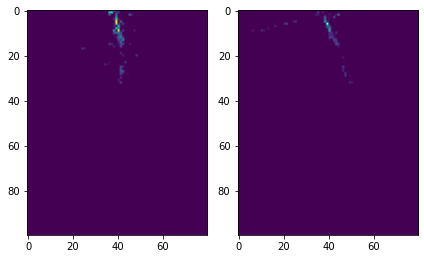

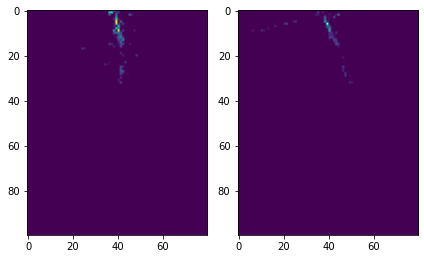

KeyboardInterrupt: 

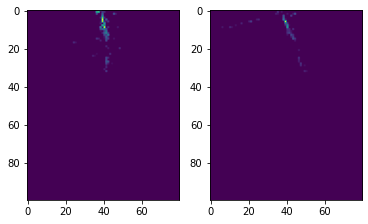

In [18]:
# draw two pixel maps for the first event
for i in range(len(dset_eventmap)):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(image[0, :, :])
    axs[1].imshow(image[1, :, :])
    fig.tight_layout()
    
    plt.show()

In [ ]:
 colors = ['b', 'r', 'g']
    for i, e in enumerate(energies):
        axes.hist(e, bins=200, normed=1, range=(0,0.1), histtype='step', color=colors[i])
    if len(energies) > 1:
        axes.legend(handles=[mpatches.Patch(color='b', label='Top-view'),
                             mpatches.Patch(color='r', label='Side-view')],
                    prop={'size': 18})
    axes.set_xlabel('Energy (GeV)', fontsize=labelsize)
    axes.set_ylabel('Density', fontsize=labelsize)